## A Study on Breast Cancer Diagnosis using Machine Learning

In [1]:
#Import liabraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Set seaborn context for plotting
sns.set_context('poster')

In [2]:
#Load dataset from file
file_path = r"C:\Users\maure\Desktop\machine learning\MS4S16_Dataset.csv"
dataset = pd.read_csv(file_path)



id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302.0         M        17.99         10.38          122.80     1001.0   
1    842517.0         M        20.57         17.77          132.90     1326.0   
2  84300903.0         M        19.69         21.25          130.00     1203.0   
3  84348301.0         M        11.42         20.38           77.58      386.1   
4  84358402.0         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
# Display the first few rows of the dataset to inspect the columns
dataset.head()


In [3]:
# Display the last few rows of the dataset
dataset.tail()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
566  926682.0         M        20.13         28.25          131.20     1261.0   
567  926954.0         M        16.60         28.08          108.30      858.1   
568  927241.0         M        20.60         29.33          140.10     1265.0   
569   92751.0         B         7.76         24.54           47.92      181.0   
570   92751.0         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
566          0.09780           0.10340         0.14400              0.09791   
567          0.08455           0.10230         0.09251              0.05302   
568          0.11780           0.27700         0.35140              0.15200   
569          0.05263           0.04362         0.00000              0.00000   
570          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
566  ...        23.690          38.25           155.00      1731.0   
567  ...        18.980          34.12           126.70      1124.0   
568  ...        25.740          39.42           184.60      1821.0   
569  ...         9.456          30.37            59.16       268.6   
570  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
566           0.11660            0.19220           0.3215   
567           0.11390            0.30940           0.3403   
568           0.16500            0.86810           0.9387   
569           0.08996            0.06444           0.0000   
570           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
566                0.1628          0.2572                  0.06637  
567                0.1418          0.2218                  0.07820  
568                0.2650          0.4087                  0.12400  
569                0.0000          0.2871                  0.07039  
570                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [4]:
# Get the dimensions (number of rows and columns) of the dataset
dataset.shape

(571, 32)

In [5]:
# Generate summary statistics for numerical columns
dataset.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.680000e+02   566.000000    565.000000      567.000000   566.000000   
mean   3.011402e+07    14.103267   -241.973664       91.949048   654.942403   
std    1.250894e+08     3.517424    445.216862       24.358029   352.555899   
min    8.670000e+03     6.981000   -999.000000       43.790000   143.500000   
25%    8.690778e+05    11.692500   -999.000000       75.190000   420.300000   
50%    9.060010e+05    13.320000     17.000000       86.240000   548.750000   
75%    8.812852e+06    15.780000     21.010000      104.200000   787.050000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       568.000000        567.000000      567.000000           563.000000   
mean          0.096312          0.104333        0.088712            -3.500369   
std           0.014178          0.052878        0.079739            59.492306   
min           0.052630          0.019380        0.000000          -999.000000   
25%           0.086290          0.064710        0.029520             0.019885   
50%           0.095895          0.092630        0.061540             0.033340   
75%           0.105325          0.130400        0.130000             0.073520   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     568.000000  ...    558.000000     550.000000       565.000000   
mean        0.187402  ...     16.269794      25.735691       110.948035   
std         0.115008  ...      4.842370       6.123776        59.245691   
min         0.000700  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.015000      21.222500        84.160000   
50%         0.179200  ...     14.965000      25.455000        97.820000   
75%         0.195700  ...     18.782500      29.705000       126.900000   
max         2.100000  ...     36.040000      49.540000       910.000000   

         area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count    567.000000        562.000000         567.000000       568.000000   
mean     897.936508          0.132469           0.254412         0.272125   
std      688.231051          0.022865           0.157582         0.208867   
min      185.200000          0.071170           0.027290         0.000000   
25%      515.550000          0.116850           0.147450         0.114475   
50%      686.600000          0.131350           0.214100         0.227450   
75%     1091.500000          0.146000           0.339500         0.383500   
max    10056.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            565.000000      567.000000               558.000000  
mean               0.114470        0.290327                 0.084020  
std                0.065854        0.061907                 0.018171  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250450                 0.071318  
50%                0.099930        0.282600                 0.079960  
75%                0.161300        0.318550                 0.092088  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [6]:
# Display summary information about the dataset to understand the structure, data types, and missing values in the DataFrame

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    float64
 1   diagnosis                568 non-null    object 
 2   radius_mean              566 non-null    float64
 3   texture_mean             565 non-null    float64
 4   perimeter_mean           567 non-null    float64
 5   area_mean                566 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         567 non-null    float64
 8   concavity_mean           567 non-null    float64
 9   concave points_mean      563 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   567 non-null    float64
 12  radius_se                565 non-null    float64
 13  texture_se               563 non-null    float64
 14  perimeter_se             5

In [7]:

# Check for null values in the dataset

dataset.isnull().sum()

id                          3
diagnosis                   3
radius_mean                 5
texture_mean                6
perimeter_mean              4
area_mean                   5
smoothness_mean             3
compactness_mean            4
concavity_mean              4
concave points_mean         8
symmetry_mean               3
fractal_dimension_mean      4
radius_se                   6
texture_se                  8
perimeter_se                3
area_se                     6
smoothness_se               6
compactness_se              7
concavity_se                8
concave points_se           9
symmetry_se                 8
fractal_dimension_se        7
radius_worst               13
texture_worst              21
perimeter_worst             6
area_worst                  4
smoothness_worst            9
compactness_worst           4
concavity_worst             3
concave points_worst        6
symmetry_worst              4
fractal_dimension_worst    13
dtype: int64

In [8]:
# Count the number of duplicate rows in the dataset
dataset.duplicated().sum()


4


## Data Cleaning


In [9]:
# Drop duplicates
dataset.drop_duplicates(inplace=True)


In [10]:
# Check for null values after dropping duplicates
dataset.isnull().sum()

id                          1
diagnosis                   1
radius_mean                 3
texture_mean                4
perimeter_mean              2
area_mean                   3
smoothness_mean             1
compactness_mean            2
concavity_mean              2
concave points_mean         6
symmetry_mean               1
fractal_dimension_mean      2
radius_se                   4
texture_se                  6
perimeter_se                1
area_se                     4
smoothness_se               4
compactness_se              5
concavity_se                6
concave points_se           7
symmetry_se                 6
fractal_dimension_se        5
radius_worst               11
texture_worst              19
perimeter_worst             4
area_worst                  2
smoothness_worst            7
compactness_worst           2
concavity_worst             1
concave points_worst        4
symmetry_worst              2
fractal_dimension_worst    11
dtype: int64

In [11]:
# Replace -999 with NaN in the entire DataFrame

dataset.replace(-999, np.nan, inplace=True)

In [12]:
# Replace 0 with NaN in the rows with zero values

dataset.replace(0, np.nan, inplace=True)


In [13]:
# Calculate medians for numeric columns and Fill missing values in all numeric columns with their respective medians

medians = dataset.select_dtypes(include=[np.number]).median()

dataset.fillna(medians, inplace=True)

In [14]:
# Check for null values after replacing and filling NaNs with medians
dataset.isnull().sum()

id                         0
diagnosis                  1
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

This result shows that there is a null values in our target variable diagnosis. it will be handled next. let's inspect our target variable diagnosis

In [15]:
# Check unique values in the 'diagnosis' column
dataset.diagnosis.unique()

array(['M', 'B', nan], dtype=object)

In [16]:
# Drop rows with NaN values in the 'diagnosis' column 
dataset.dropna(subset=['diagnosis'], inplace=True)

In [17]:
# output a Series with counts for each unique value in the 'diagnosis' column.
dataset.diagnosis.value_counts()

diagnosis
B    355
M    211
Name: count, dtype: int64

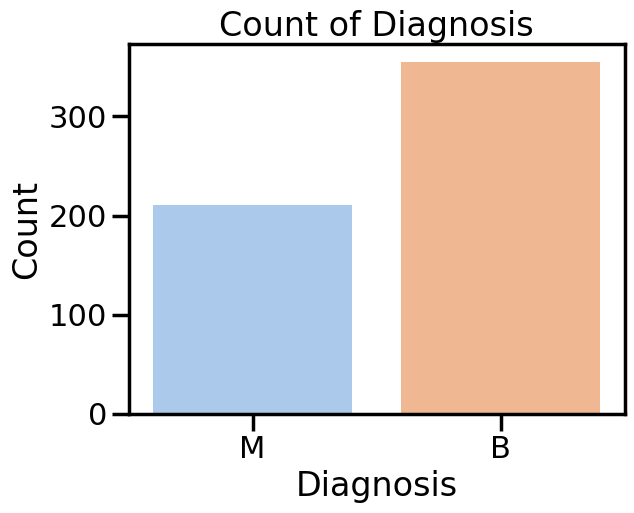

In [18]:
# Plot the counts using a bar plot 
sns.countplot(x='diagnosis', data=dataset, palette='pastel')
plt.title('Count of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [19]:
# Drops 'id' column 

dataset.drop('id',axis=1,inplace=True)


In [20]:
# Display the first few rows of the cleaned dataset
dataset.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [21]:
# Encoding catergorical variable using label encoder.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset.diagnosis= label_encoder.fit_transform(dataset.diagnosis.values)
print(label_encoder.fit_transform(dataset.diagnosis.values))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 

Using Label encoder for our diagnosis dataset offers simplicity, compatibility with various algorithms, efficiency, interpretability, prevention of data leakage, and ease of understanding

In [57]:
# Display the cleaned dataset with the encoded diagnosis

dataset

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0            1        17.99         10.38          0.11840           0.27760   
1            1        20.57         17.77          0.08474           0.07864   
2            1        19.69         21.25          0.10960           0.15990   
3            1        11.42         20.38          0.14250           0.28390   
4            1        20.29         14.34          0.10030           0.13280   
..         ...          ...           ...              ...               ...   
565          1        21.56         22.39          0.11100           0.11590   
566          1        20.13         28.25          0.09780           0.10340   
567          1        16.60         28.08          0.08455           0.10230   
568          1        20.60         29.33          0.11780           0.27700   
569          0         7.76         24.54          0.05263           0.04362   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
565         0.1726                 0.05623     1.1760      1.2560   
566         0.1752                 0.05533     0.7655      2.4630   
567         0.1590                 0.05648     0.4564      1.0750   
568         0.2397                 0.06155     0.7260      1.5950   
569         0.1587                 0.05884     0.3857      1.4280   

     smoothness_se  symmetry_se  fractal_dimension_se  symmetry_worst  
0         0.006399      0.03003              0.006193          0.4601  
1         0.005225      0.01389              0.003532          0.2750  
2         0.006150      0.02250              0.004571          0.3613  
3         0.009110      0.05963              0.009208          0.6638  
4         0.011490      0.01756              0.005115          0.2364  
..             ...          ...                   ...             ...  
565       0.010300      0.01114              0.004239          0.2060  
566       0.005769      0.01898              0.002498          0.2572  
567       0.005903      0.01318              0.003892          0.2218  
568       0.006522      0.02324              0.006185          0.4087  
569       0.007189      0.02676              0.002783          0.2871  

[566 rows x 13 columns]

In [23]:
# Calculate correlation matrix
dataset.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.726603      0.347098        0.741304   
radius_mean               0.726603     1.000000      0.276632        0.989612   
texture_mean              0.347098     0.276632      1.000000        0.293205   
perimeter_mean            0.741304     0.989612      0.293205        1.000000   
area_mean                 0.706498     0.977328      0.281621        0.985114   
smoothness_mean           0.357097     0.163602     -0.011666        0.204685   
compactness_mean          0.595066     0.497277      0.224097        0.554366   
concavity_mean            0.689753     0.646067      0.270051        0.699005   
concave points_mean       0.763878     0.796218      0.254256        0.834480   
symmetry_mean             0.154328     0.175152      0.057684        0.189763   
fractal_dimension_mean   -0.014042    -0.314363     -0.061454       -0.264442   
radius_se                 0.564579     0.677001      0.213742        0.688781   
texture_se               -0.012857    -0.107238      0.331975       -0.086965   
perimeter_se              0.556246     0.673813      0.226253        0.693437   
area_se                   0.549677     0.733709      0.197915        0.743121   
smoothness_se            -0.066651    -0.223712     -0.017462       -0.198648   
compactness_se            0.301198     0.205304      0.165433        0.254459   
concavity_se              0.238182     0.158533      0.123191        0.201235   
concave points_se         0.387394     0.321880      0.145517        0.362949   
symmetry_se              -0.004272    -0.104474      0.013773       -0.080622   
fractal_dimension_se     -0.026392    -0.062047     -0.050712       -0.060500   
radius_worst              0.766950     0.955473      0.314833        0.958671   
texture_worst             0.443148     0.274218      0.815168        0.287969   
perimeter_worst           0.397147     0.507229      0.250378        0.522698   
area_worst                0.588311     0.756402      0.210731        0.759868   
smoothness_worst          0.420641     0.113205      0.080386        0.147069   
compactness_worst         0.590167     0.409922      0.261908        0.454326   
concavity_worst           0.652317     0.492558      0.281377        0.539924   
concave points_worst      0.789412     0.710400      0.285763        0.747000   
symmetry_worst            0.415558     0.162541      0.114001        0.187526   
fractal_dimension_worst   0.320362     0.004832      0.116386        0.048628   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.706498         0.357097          0.595066   
radius_mean               0.977328         0.163602          0.497277   
texture_mean              0.281621        -0.011666          0.224097   
perimeter_mean            0.985114         0.204685          0.554366   
area_mean                 1.000000         0.174701          0.496650   
smoothness_mean           0.174701         1.000000          0.658781   
compactness_mean          0.496650         0.658781          1.000000   
concavity_mean            0.674333         0.513900          0.874501   
concave points_mean       0.814414         0.540140          0.806675   
symmetry_mean             0.188701         0.176153          0.267486   
fractal_dimension_mean   -0.284584         0.545292          0.542368   
radius_se                 0.727585         0.303219          0.496922   
texture_se               -0.069117         0.071328          0.047027   
perimeter_se              0.726148         0.296053          0.549050   
area_se                   0.797793         0.249566          0.457502   
smoothness_se            -0.164295         0.326500          0.132766   
compactness_se            0.217208         0.329636          0.731637   
concavity_se              0.186578         0.236716          0.555248   
concave points_se         0.337213         0.

Strong Positive Correlations with Diagnosis:

Features like 'radius_mean,' 'perimeter_mean,' 'area_mean,' 'radius_worst,' 'perimeter_worst,' and 'area_worst' exhibit strong positive correlations with the diagnosis. This suggests that as these features increase, the likelihood of a malignant diagnosis (M=1) also increases.

Moderate Positive Correlations with Diagnosis:

'texture_mean,' 'smoothness_mean,' 'compactness_mean,' 'concavity_mean,' 'concave points_mean,' 'symmetry_mean,' 'texture_worst,' 'smoothness_worst,' 'compactness_worst,' 'concavity_worst,' and 'concave points_worst' show moderate positive correlations with the diagnosis.

Weak Correlations with Diagnosis:

'fractal_dimension_mean,' 'radius_se,' 'texture_se,' 'perimeter_se,' 'area_se,' 'smoothness_se,' 'compactness_se,' 'concavity_se,' 'concave points_se,' 'symmetry_se,' 'fractal_dimension_se,' 'symmetry_worst,' and 'fractal_dimension_worst' have weaker correlations with the diagnosis.
Negative Correlation with Diagnosis:

'smoothness_se' has a negative correlation with the diagnosis, indicating that lower smoothness is associated with a higher likelihood of a malignant diagnosis.

## Data Visualisation

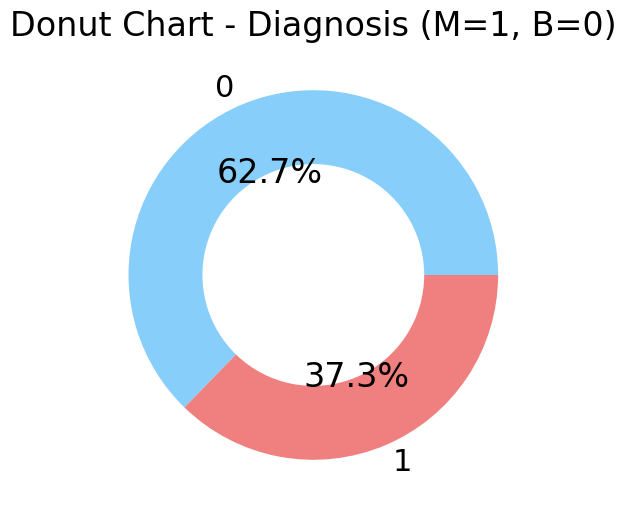

In [59]:
#Visualize diagnosis using donut Chart
# Sort the diagnosis values to ensure consistency in labeling and counting
sorted_diagnosis = dataset['diagnosis'].value_counts().sort_index()

#Plot diagnosis using donut Chart

plt.figure(figsize=(6, 6))
plt.pie(sorted_diagnosis, labels=sorted_diagnosis.index, colors=['lightskyblue', 'lightcoral'], autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.title('Donut Chart - Diagnosis (M=1, B=0)')
plt.show()

The above chart shows that the distribution of diagnosis indicates that 37.3% of cases are classified as Malignant ('M'), while 62.7% are classified as Benign ('B'). This suggests that the dataset contains a relatively higher proportion of Benign cases compared to Malignant cases."

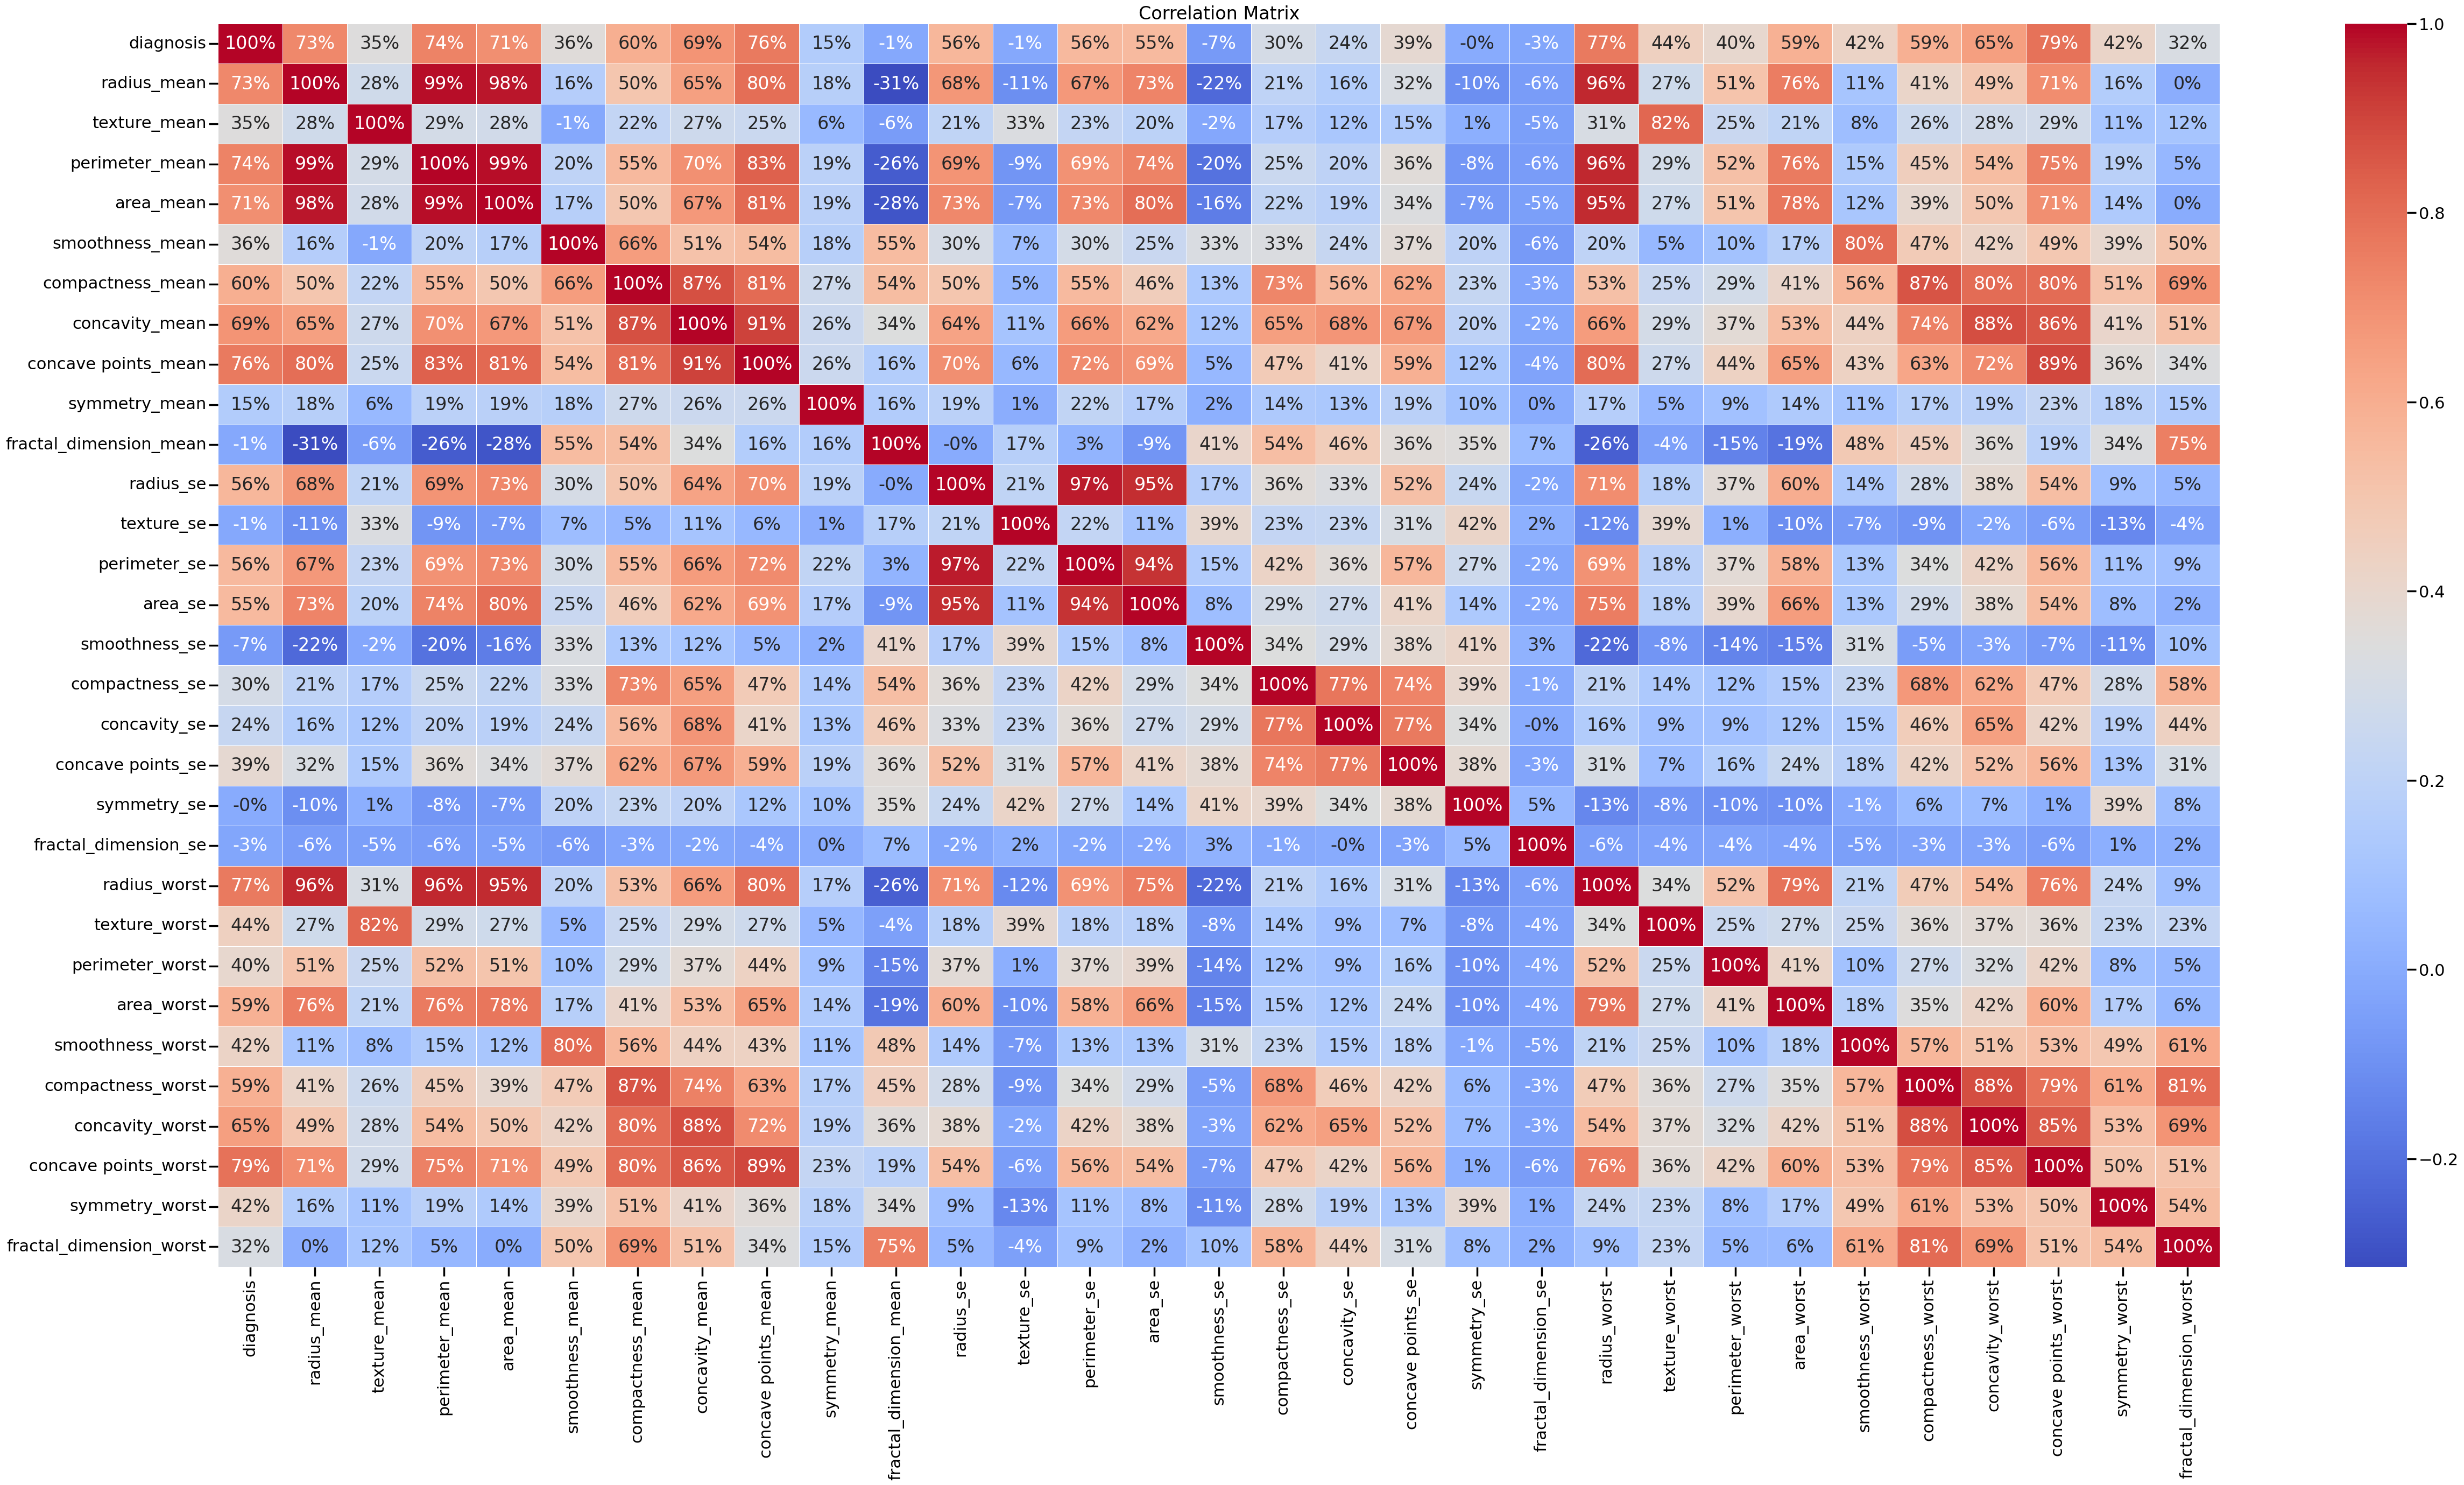

In [25]:
#Visualise Corr result using a heapmap
correlation_matrix = dataset.corr()

plt.figure(figsize=(60, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".00%", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

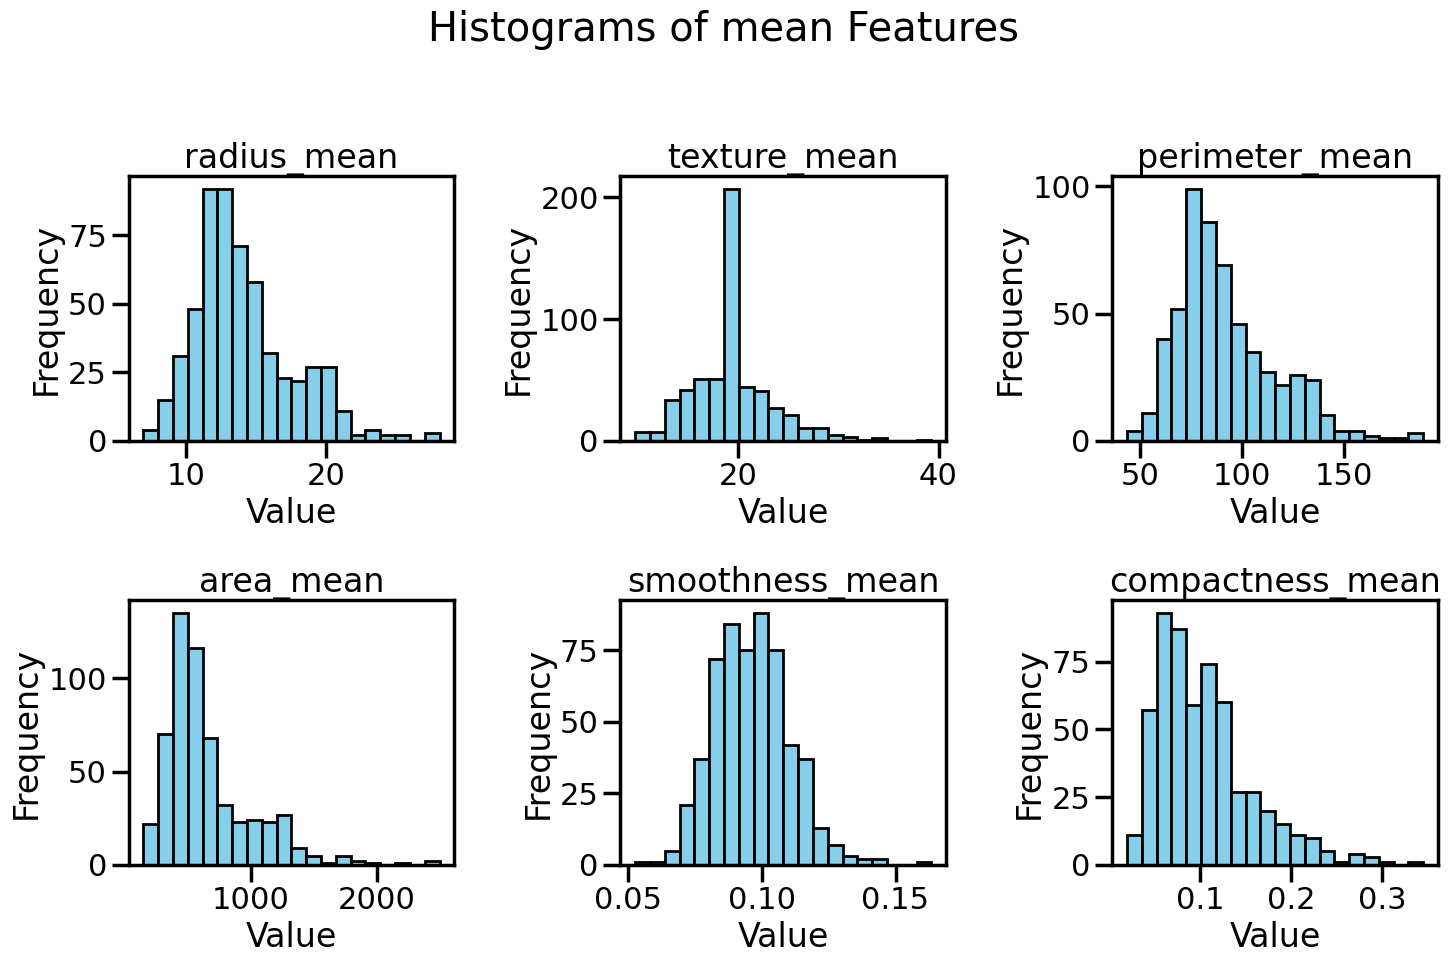

In [26]:
# Visualise mean features using histogram

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Histograms of mean Features')

# Flatten the axes for easy iteration
axes = axes.flatten()


for i, feature in enumerate(features):
    axes[i].hist(dataset[feature], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')


plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


Features like radius_mean, perimeter_mean, and area_mean exhibit strong positive correlations, indicating their importance in predicting malignant tumors. On the other hand, features like smoothness_mean have weaker correlations and may have less influence on the diagnosis prediction.

## Feature Selection and Scaling

In [28]:
# List of columns to drop
columns_to_drop = [
    'perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'compactness_se',
    'perimeter_worst', 'area_worst', 'radius_worst', 'texture_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_mean', 'concave points_mean',
    'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst',
    'fractal_dimension_worst'
]

# Drop columns from dataset
dataset.drop(columns=columns_to_drop, inplace=True)

# Display remaining columns
print(dataset.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se',
       'fractal_dimension_se', 'symmetry_worst'],
      dtype='object')


I used a technique based on retaining one variable ('A') and removing the other ('B') for highly correlated variables. After applying this technique, I dropped 18 highly correlated features, resulting in the retention of 12 features alongside the target variable 'diagnosis

In [60]:
# Calculate and display correlation matrix
dataset.corr()

diagnosis  radius_mean  texture_mean  smoothness_mean  \
diagnosis                1.000000     0.726603      0.347098         0.357097   
radius_mean              0.726603     1.000000      0.276632         0.163602   
texture_mean             0.347098     0.276632      1.000000        -0.011666   
smoothness_mean          0.357097     0.163602     -0.011666         1.000000   
compactness_mean         0.595066     0.497277      0.224097         0.658781   
symmetry_mean            0.154328     0.175152      0.057684         0.176153   
fractal_dimension_mean  -0.014042    -0.314363     -0.061454         0.545292   
radius_se                0.564579     0.677001      0.213742         0.303219   
texture_se              -0.012857    -0.107238      0.331975         0.071328   
smoothness_se           -0.066651    -0.223712     -0.017462         0.326500   
symmetry_se             -0.004272    -0.104474      0.013773         0.200307   
fractal_dimension_se    -0.026392    -0.062047     -0.050712        -0.063479   
symmetry_worst           0.415558     0.162541      0.114001         0.394821   

                        compactness_mean  symmetry_mean  \
diagnosis                       0.595066       0.154328   
radius_mean                     0.497277       0.175152   
texture_mean                    0.224097       0.057684   
smoothness_mean                 0.658781       0.176153   
compactness_mean                1.000000       0.267486   
symmetry_mean                   0.267486       1.000000   
fractal_dimension_mean          0.542368       0.156166   
radius_se                       0.496922       0.190819   
texture_se                      0.047027       0.005581   
smoothness_se                   0.132766       0.018704   
symmetry_se                     0.231466       0.101146   
fractal_dimension_se           -0.031559       0.002904   
symmetry_worst                  0.512406       0.179773   

                        fractal_dimension_mean  radius_se  texture_se  \
diagnosis                            -0.014042   0.564579   -0.012857   
radius_mean                          -0.314363   0.677001   -0.107238   
texture_mean                         -0.061454   0.213742    0.331975   
smoothness_mean                       0.545292   0.303219    0.071328   
compactness_mean                      0.542368   0.496922    0.047027   
symmetry_mean                         0.156166   0.190819    0.005581   
fractal_dimension_mean                1.000000  -0.003639    0.174470   
radius_se                            -0.003639   1.000000    0.212735   
texture_se                            0.174470   0.212735    1.000000   
smoothness_se                         0.406932   0.165376    0.390128   
symmetry_se                           0.348923   0.240314    0.416822   
fractal_dimension_se                  0.068264  -0.023311    0.018798   
symmetry_worst                        0.336270   0.091147   -0.127122   

                        smoothness_se  symmetry_se  fractal_dimension_se  \
diagnosis                   -0.066651    -0.004272             -0.026392   
radius_mean                 -0.223712    -0.104474             -0.062047   
texture_mean                -0.017462     0.013773             -0.050712   
smoothness_mean              0.326500     0.200307             -0.063479   
compactness_mean             0.132766     0.231466             -0.031559   
symmetry_mean                0.018704     0.101146              0.002904   
fractal_dimension_mean       0.406932     0.348923              0.068264   
radius_se                    0.165376     0.240314             -0.023311   
texture_se                   0.390128     0.416822              0.018798   
smoothness_se                1.000000     0.410828              0.026633   
symmetry_se                  0.410828     1.000000              0.050365   
fractal_dimension_se         0.026633     0.050365              1.000000   
symmetry_worst              -0.109419     0.386380 

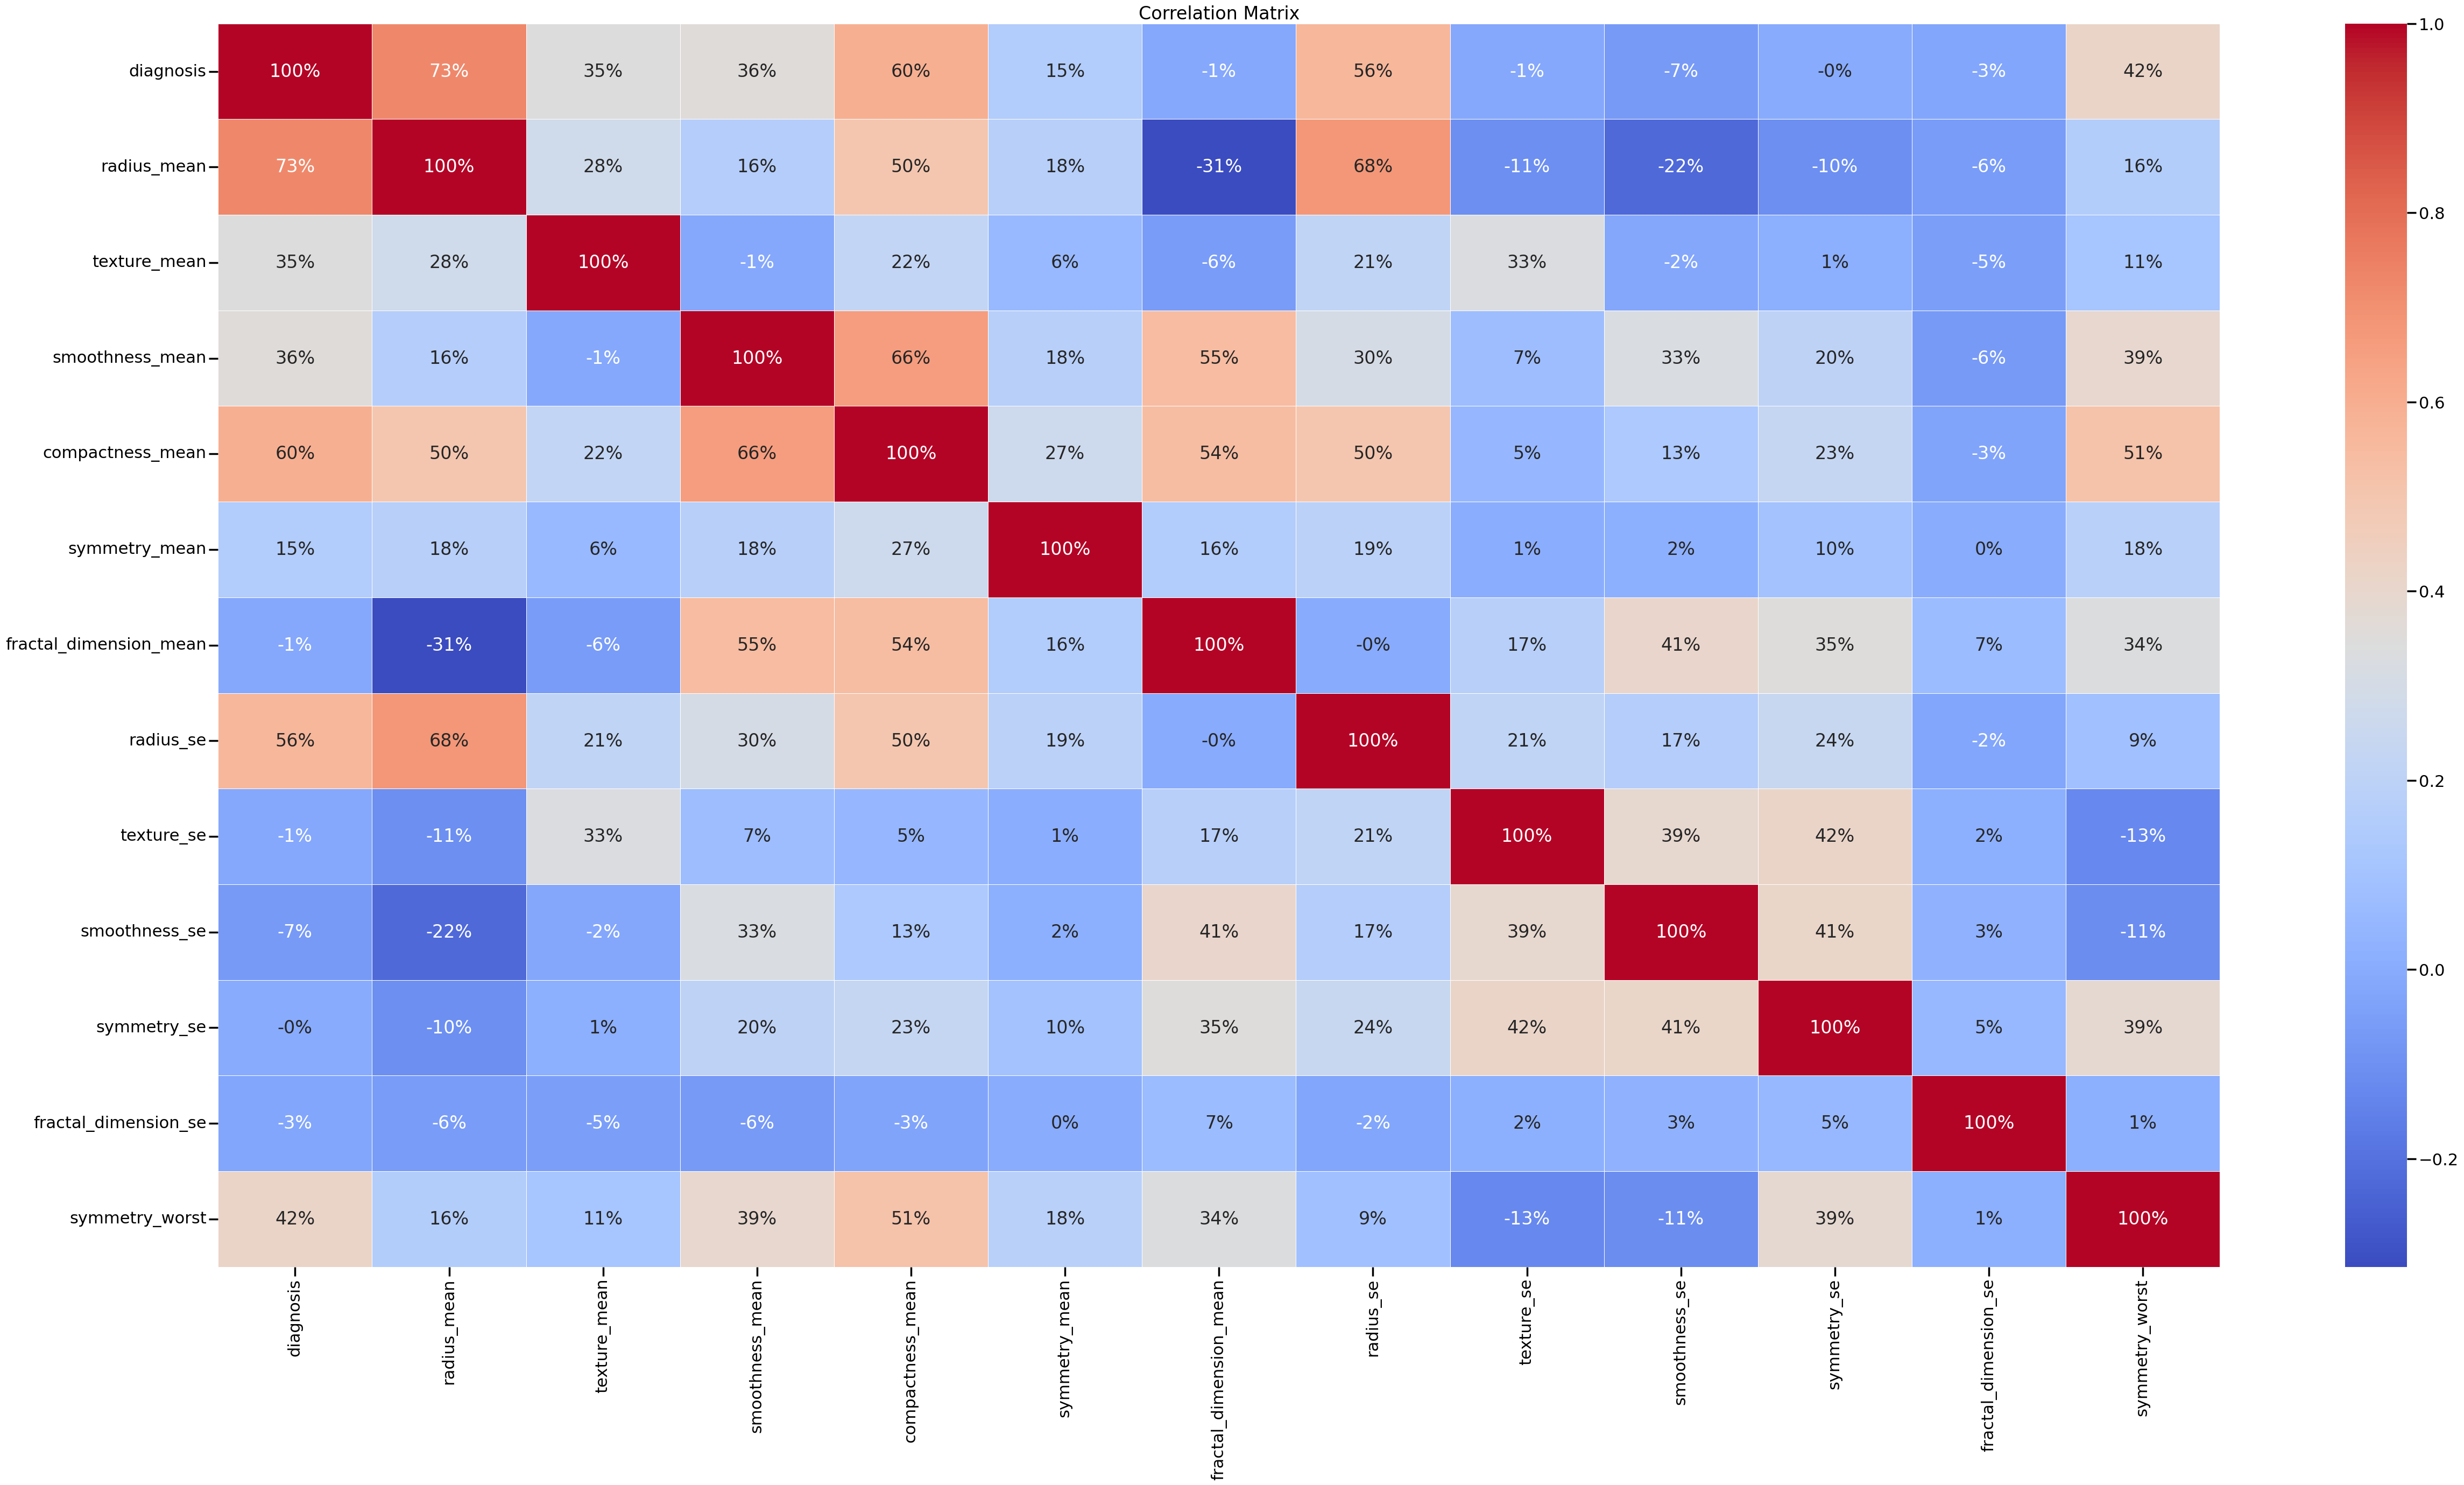

In [29]:
# Visualize correlations of the selected features
correlation_matrix = dataset.corr()

plt.figure(figsize=(60, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".00%", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\maure\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


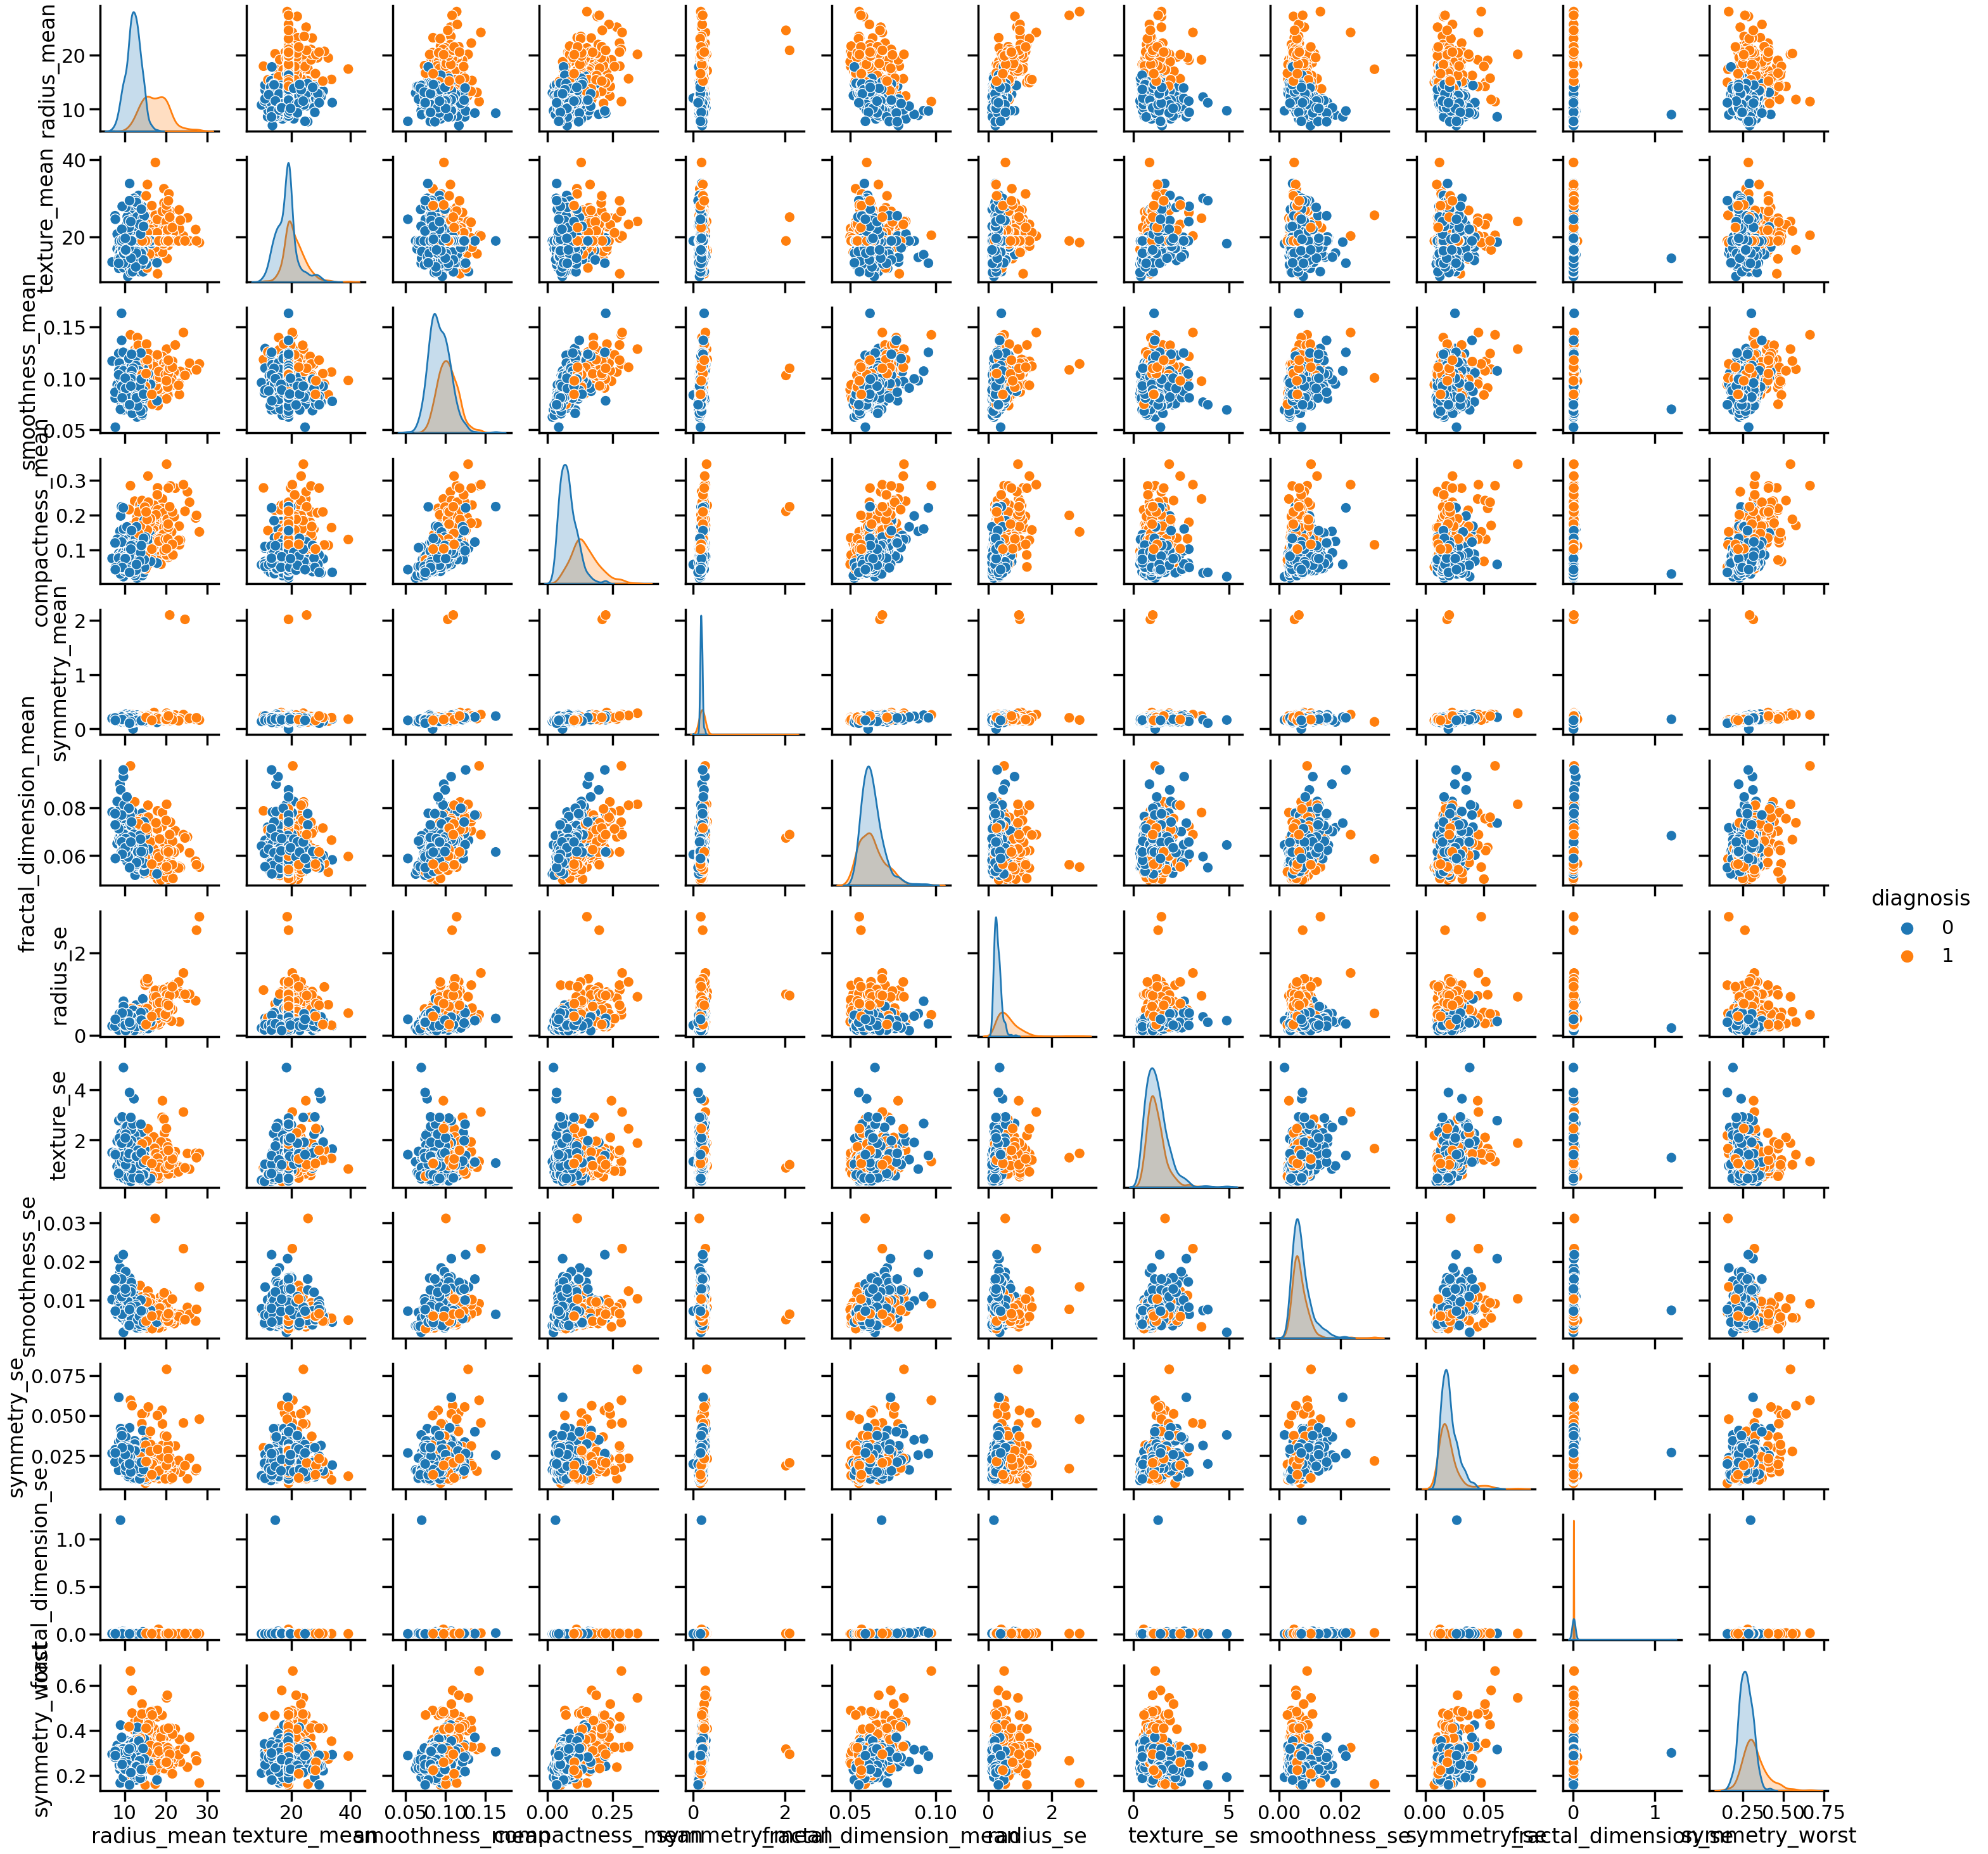

In [61]:
# Visualize selected features using a pairplot
sns.pairplot(dataset, hue='diagnosis')
plt.show()

In [31]:
dataset_selected.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se',
       'fractal_dimension_se', 'symmetry_worst'],
      dtype='object')

The pairplot analysis provides valuable insights into the relationships between various features and the target variable (diagnosis). Here's a breakdown of the observations made from the pairplot:

Positive Correlation Trends: Features such as radius_mean, compactness_mean, and radius_se exhibit a positive correlation with the target variable (diagnosis). In the pairplot, these features show increasing trends or clusters with respect to the diagnosis categories, indicating that higher values of these features are associated with a higher likelihood of a malignant diagnosis.

No Significant Negative Correlations: There are no features that display a notable negative correlation with the target variable. As a result, we do not observe any clear decreasing trends or clusters in the pairplot.

Strong Correlations Between Features: Features that are highly correlated with each other, such as radius_mean and radius_se, tend to display strong linear relationships in the pairplot. This is evident from the tight clusters or linear trends observed in the scatter plots between these features.

Random or Noisy Relationships: Features with low correlation coefficients with the target variable and other features may exhibit random or noisy relationships in the pairplot. These relationships do not provide significant predictive value and may appear as scattered or irregular patterns in the pairplot.

Overall Patterns: The pairplot analysis reveals various overall patterns such as clusters, trends, or outliers, which aid in understanding the relationships between different features and the likelihood of a malignant diagnosis.




In [32]:
# Summary statistics
print(dataset.describe())

# Check for normality of features, etc.

from scipy.stats import shapiro

stat, p = shapiro(dataset['radius_se'])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


        diagnosis  radius_mean  texture_mean  smoothness_mean  \
count  566.000000   566.000000    566.000000       566.000000   
mean     0.372792    14.104804     19.249311         0.096382   
std      0.483975     3.503743      3.886904         0.014082   
min      0.000000     6.981000      9.710000         0.052630   
25%      0.000000    11.702500     17.120000         0.086380   
50%      0.000000    13.320000     18.910000         0.095895   
75%      1.000000    15.772500     20.997500         0.105375   
max      1.000000    28.110000     39.280000         0.163400   

       compactness_mean  symmetry_mean  fractal_dimension_mean   radius_se  \
count        566.000000     566.000000              566.000000  566.000000   
mean           0.104376       0.187410                0.062742    0.404783   
std            0.052856       0.115200                0.006898    0.277568   
min            0.019380       0.000700                0.049960    0.111500   
25%            0.065005 

The Shapiro-Wilk test evaluates the null hypothesis that a sample comes from a normally distributed population.
In this case, the p-value obtained from testing the normality of the radius_se feature is less than the significance level (0.05). Hence, we reject the null hypothesis, indicating that the data does not follow a Gaussian distribution.


## Feature Scaling

In [33]:
#Splitting the dataset into X and y
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

In [34]:
# Display X

X

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
565        21.56         22.39          0.11100           0.11590   
566        20.13         28.25          0.09780           0.10340   
567        16.60         28.08          0.08455           0.10230   
568        20.60         29.33          0.11780           0.27700   
569         7.76         24.54          0.05263           0.04362   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
565         0.1726                 0.05623     1.1760      1.2560   
566         0.1752                 0.05533     0.7655      2.4630   
567         0.1590                 0.05648     0.4564      1.0750   
568         0.2397                 0.06155     0.7260      1.5950   
569         0.1587                 0.05884     0.3857      1.4280   

     smoothness_se  symmetry_se  fractal_dimension_se  symmetry_worst  
0         0.006399      0.03003              0.006193          0.4601  
1         0.005225      0.01389              0.003532          0.2750  
2         0.006150      0.02250              0.004571          0.3613  
3         0.009110      0.05963              0.009208          0.6638  
4         0.011490      0.01756              0.005115          0.2364  
..             ...          ...                   ...             ...  
565       0.010300      0.01114              0.004239          0.2060  
566       0.005769      0.01898              0.002498          0.2572  
567       0.005903      0.01318              0.003892          0.2218  
568       0.006522      0.02324              0.006185          0.4087  
569       0.007189      0.02676              0.002783          0.2871  

[566 rows x 12 columns]

In [35]:
# Display y

y

0      1
1      1
2      1
3      1
4      1
      ..
565    1
566    1
567    1
568    1
569    0
Name: diagnosis, Length: 566, dtype: int32

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Display the training dataset
X_train

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
117       14.870         16.67          0.11620           0.16490   
211       11.840         18.94          0.08871           0.06900   
0         17.990         10.38          0.11840           0.27760   
331       12.980         19.35          0.09579           0.11250   
11        15.780         17.89          0.09710           0.12920   
..           ...           ...              ...               ...   
71         8.888         14.64          0.09783           0.15310   
106       11.640         18.33          0.11420           0.10170   
273        9.742         15.67          0.09037           0.04689   
438       13.850         19.60          0.08684           0.06330   
102       12.180         20.52          0.08013           0.04038   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
117         0.2157                 0.06768     0.4266      0.9489   
211         0.1533                 0.06057     0.2222      0.8652   
0           0.2419                 0.07871     1.0950      0.9053   
331         0.1761                 0.06540     0.2684      0.5664   
11          0.1842                 0.06082     0.5058      0.9849   
..             ...                     ...        ...         ...   
71          0.1902                 0.08980     0.5262      0.8522   
106         0.1801                 0.06520     0.3060      1.6570   
273         0.2081                 0.06312     0.2684      1.4090   
438         0.1555                 0.05673     0.3419      1.6780   
102         0.1739                 0.05677     0.1924      1.5710   

     smoothness_se  symmetry_se  fractal_dimension_se  symmetry_worst  
117       0.006985      0.01602              0.003884          0.3585  
211       0.005517      0.01616              0.002922          0.2535  
0         0.006399      0.03003              0.006193          0.4601  
331       0.005727      0.02751              0.004572          0.3596  
11        0.005771      0.02008              0.004144          0.3792  
..             ...          ...                   ...             ...  
71        0.017210      0.02541              0.021930          0.2254  
106       0.008540      0.01565              0.003840          0.2806  
273       0.013800      0.01798              0.004261          0.2841  
438       0.005836      0.02014              0.002326          0.2513  
102       0.005080      0.01447              0.001532          0.2694  

[452 rows x 12 columns]

In [38]:
# Display the testing dataset
X_test

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
543       14.740         25.42          0.08275           0.07214   
528       12.340         18.91          0.09003           0.06307   
234        9.567         15.91          0.08464           0.04087   
529       13.940         18.91          0.12480           0.09755   
492       18.010         18.91          0.10010           0.12890   
..           ...           ...              ...               ...   
88        12.360         21.80          0.08772           0.09445   
527       13.460         18.75          0.10750           0.11380   
440       10.970         18.91          0.08915           0.11130   
33        19.270         26.47          0.09401           0.17190   
335       17.060         21.00          0.11190           0.10560   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
543         0.1840                 0.05680     0.3031      1.3850   
528         0.1689                 0.05808     0.1166      0.4957   
234         0.1551                 0.06403     0.2152      0.8301   
529         0.1976                 0.06457     0.5461      2.6350   
492         0.2116                 0.06077     0.7548      1.2880   
..             ...                     ...        ...         ...   
88          0.1930                 0.06404     0.2978      1.5020   
527         0.1723                 0.06317     0.1998      0.6068   
440         0.1489                 0.06640     0.2574      1.3760   
33          0.1853                 0.06261     0.5558      0.6062   
335         0.1727                 0.06071     0.8161      2.1290   

     smoothness_se  symmetry_se  fractal_dimension_se  symmetry_worst  
543       0.004775      0.01870              0.002626          0.2722  
528       0.003681      0.01129              0.001366          0.3110  
234       0.011640      0.02383              0.003540          0.2757  
529       0.010040      0.01715              0.005528          0.2160  
492       0.007997      0.02897              0.003996          0.3251  
..             ...          ...                   ...             ...  
88        0.007112      0.01958              0.004463          0.2972  
527       0.004413      0.01354              0.001787          0.3518  
440       0.008565      0.01516              0.004976          0.2540  
33        0.005015      0.01543              0.003896          0.3672  
335       0.006455      0.01829              0.003733          0.2623  

[114 rows x 12 columns]

In [39]:
# Display the target variable for the training dataset
y_train

117    1
211    0
0      1
331    0
11     1
      ..
71     0
106    0
273    0
438    0
102    0
Name: diagnosis, Length: 452, dtype: int32

In [40]:
# Display the target variable for the testing dataset
y_test

543    0
528    0
234    0
529    0
492    1
      ..
88     0
527    0
440    0
33     1
335    1
Name: diagnosis, Length: 114, dtype: int32

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'center': 'fractal_dimension_se'}>,
        <Axes: title={'center': 'symmetry_worst'}>]], dtype=object)

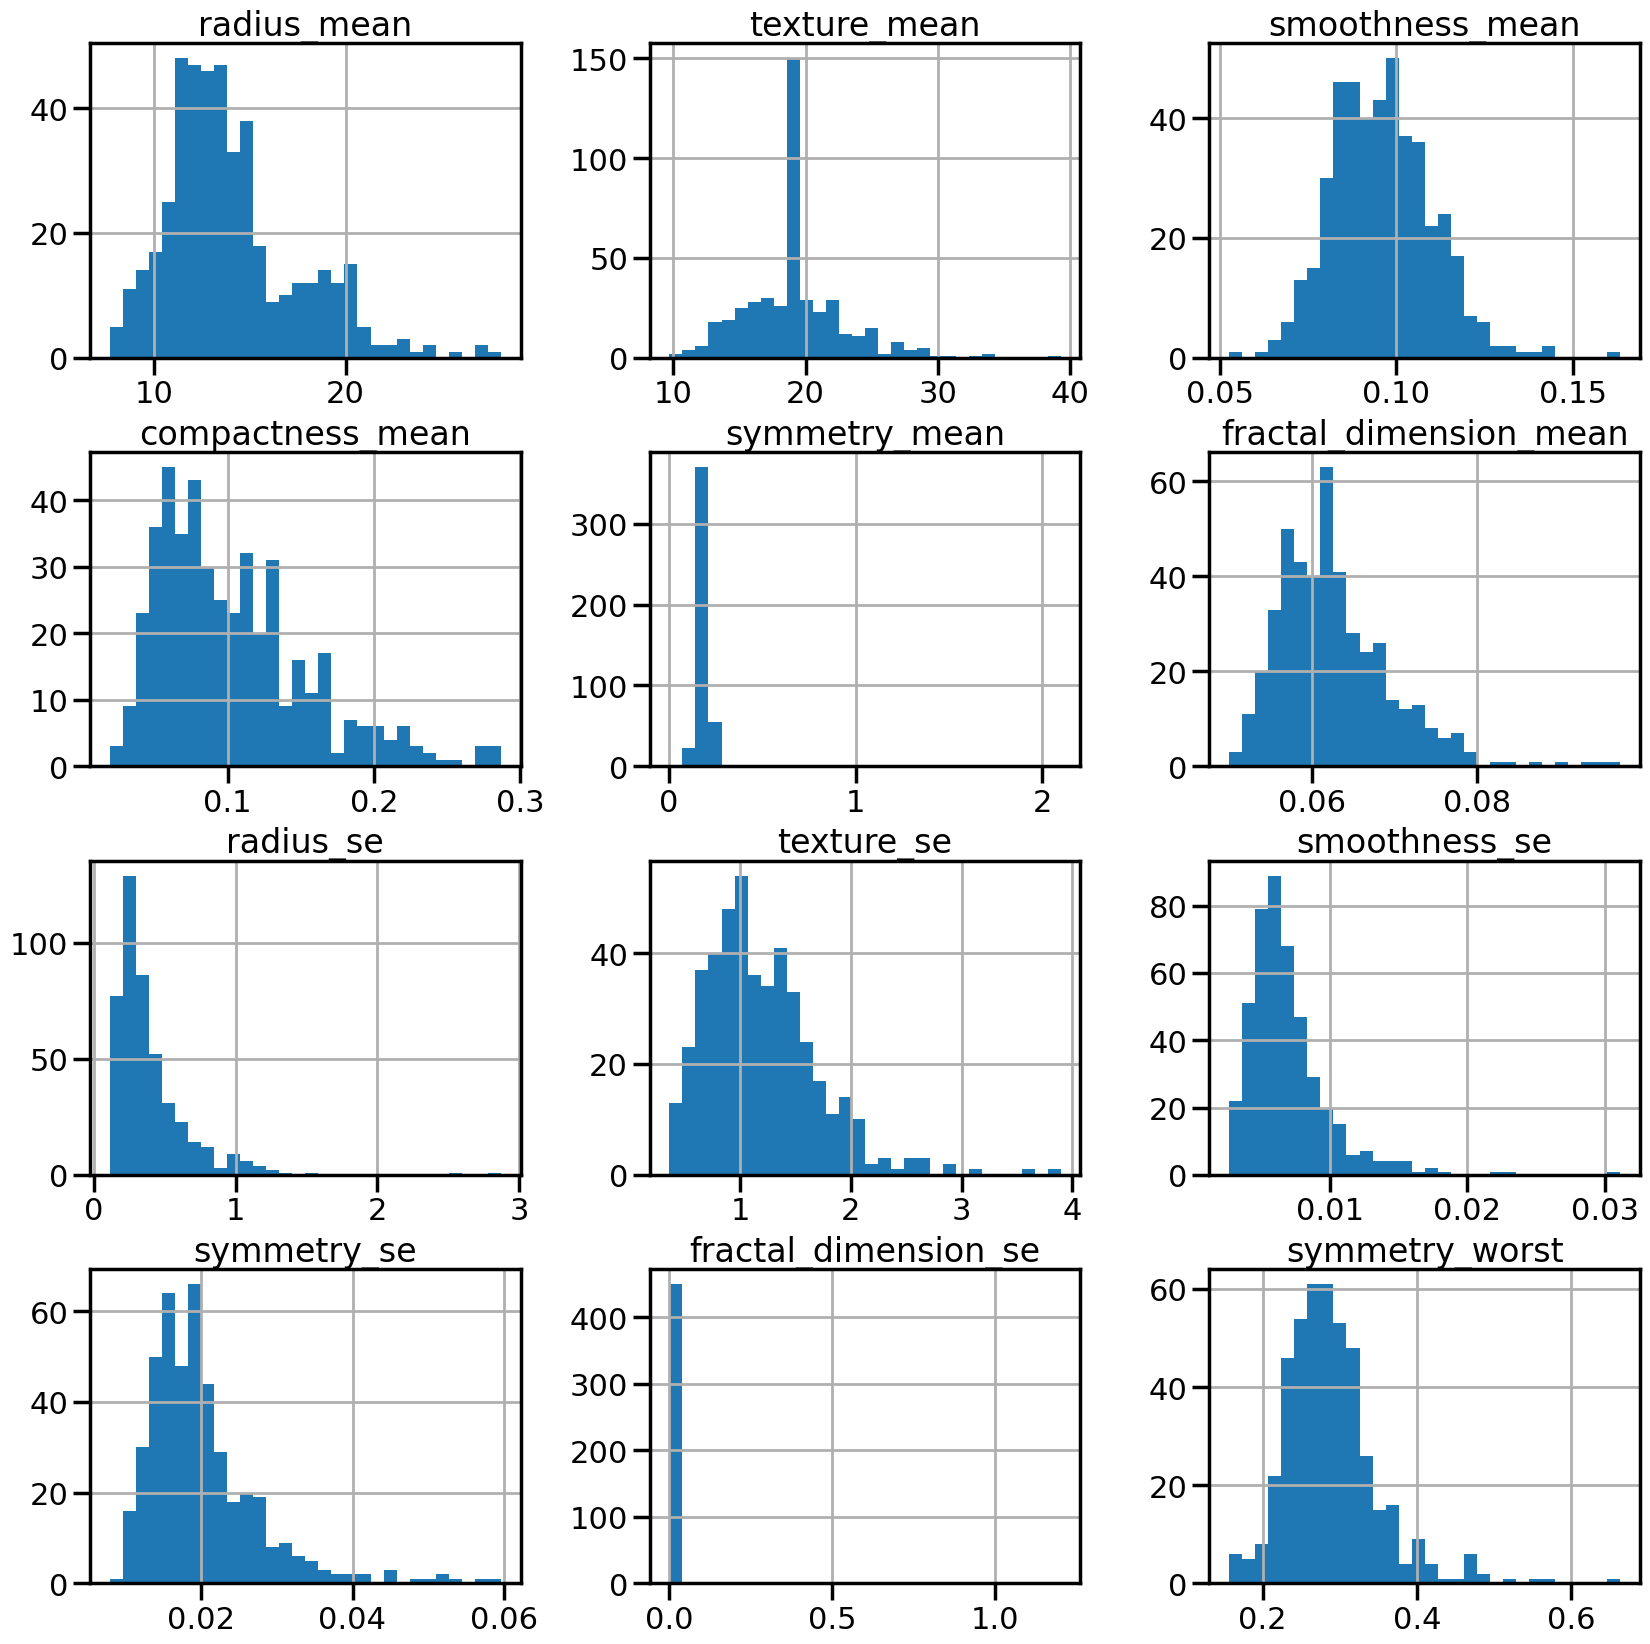

In [41]:
# Plot histograms of selected columns in the training dataset
X_train.hist(bins=30, figsize=(20, 20))


In [42]:
# Calculate skewness for each column in the training dataset
X_train.skew()


radius_mean                1.041886
texture_mean               0.912999
smoothness_mean            0.519750
compactness_mean           1.094221
symmetry_mean             13.856093
fractal_dimension_mean     1.315412
radius_se                  3.408629
texture_se                 1.251402
smoothness_se              2.541819
symmetry_se                1.891721
fractal_dimension_se      21.139054
symmetry_worst             1.481471
dtype: float64

In [43]:
# Apply Box-Cox transformation to each column in the training dataset
from scipy.stats import boxcox

X_train_boxcox = pd.DataFrame()

# Compute Box-Cox transformation for X_train
lambda_values = []
for column in X_train.columns:
    transformed_data, lambda_value = boxcox(X_train[column])
    X_train_boxcox[column] = transformed_data
    lambda_values.append(lambda_value)

# Apply the same transformation to X_test using computed lambda values
X_test_boxcox = pd.DataFrame()
for column, lambda_value in zip(X_train.columns, lambda_values):
    transformed_data = boxcox(X_test[column], lmbda=lambda_value)
    X_test_boxcox[column] = transformed_data

In [44]:
# Display the Box-Cox transformed training dataset

X_train_boxcox

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0       1.422364      3.040046        -1.976949         -1.767852   
1       1.365762      3.189314        -2.201661         -2.598066   
2       1.464626      2.495116        -1.961154         -1.264035   
3       1.389436      3.214456        -2.138234         -2.134156   
4       1.436012      3.122501        -2.126974         -2.001917   
..           ...           ...              ...               ...   
447     1.283897      2.889278        -2.120759         -1.839214   
448     1.361244      3.150938        -1.991548         -2.230334   
449     1.311475      2.968087        -2.186382         -2.961221   
450     1.405452      3.229540        -2.219190         -2.679383   
451     1.373179      3.283526        -2.285086         -3.100925   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0        -1.325594             -304.187628  -1.029153   -0.052321   
1        -1.570498             -399.707254  -2.115955   -0.143801   
2        -1.239654             -209.767658   0.089004   -0.099019   
3        -1.473024             -330.950878  -1.769237   -0.553350   
4        -1.440839             -395.677470  -0.792187   -0.015204   
..             ...                     ...        ...         ...   
447      -1.417726             -151.610361  -0.739609   -0.158723   
448      -1.456984             -333.454428  -1.544650    0.517343   
449      -1.352092             -361.144648  -1.769237    0.348537   
450      -1.560602             -469.583566  -1.364277    0.530564   
451      -1.481971             -468.770149  -2.399868    0.461563   

     smoothness_se  symmetry_se  fractal_dimension_se  symmetry_worst  
0       -17.050893   -18.656294             -4.569781       -1.289012  
1       -19.097583   -18.549199             -4.758133       -1.869590  
2       -17.787171   -12.211020             -4.252474       -0.921404  
3       -18.759677   -12.969272             -4.460084       -1.284256  
4       -18.691109   -16.051619             -4.526352       -1.202841  
..             ...          ...                   ...             ...  
447     -10.873374   -13.691999             -3.336552       -2.086856  
448     -15.462059   -18.946716             -4.577396       -1.690401  
449     -12.174868   -17.280728             -4.507628       -1.669062  
450     -18.591167   -16.019553             -4.906324       -1.885335  
451     -19.863311   -19.951739             -5.171323       -1.761327  

[452 rows x 12 columns]

In [45]:
# Calculate skewness for each column in the Box-Cox transformed training dataset

X_train_boxcox.skew()

radius_mean               0.004199
texture_mean              0.003787
smoothness_mean           0.001987
compactness_mean         -0.001544
symmetry_mean             1.801287
fractal_dimension_mean    0.013732
radius_se                 0.032709
texture_se               -0.001103
smoothness_se            -0.010776
symmetry_se               0.001059
fractal_dimension_se      0.724409
symmetry_worst           -0.033145
dtype: float64

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'center': 'fractal_dimension_se'}>,
        <Axes: title={'center': 'symmetry_worst'}>]], dtype=object)

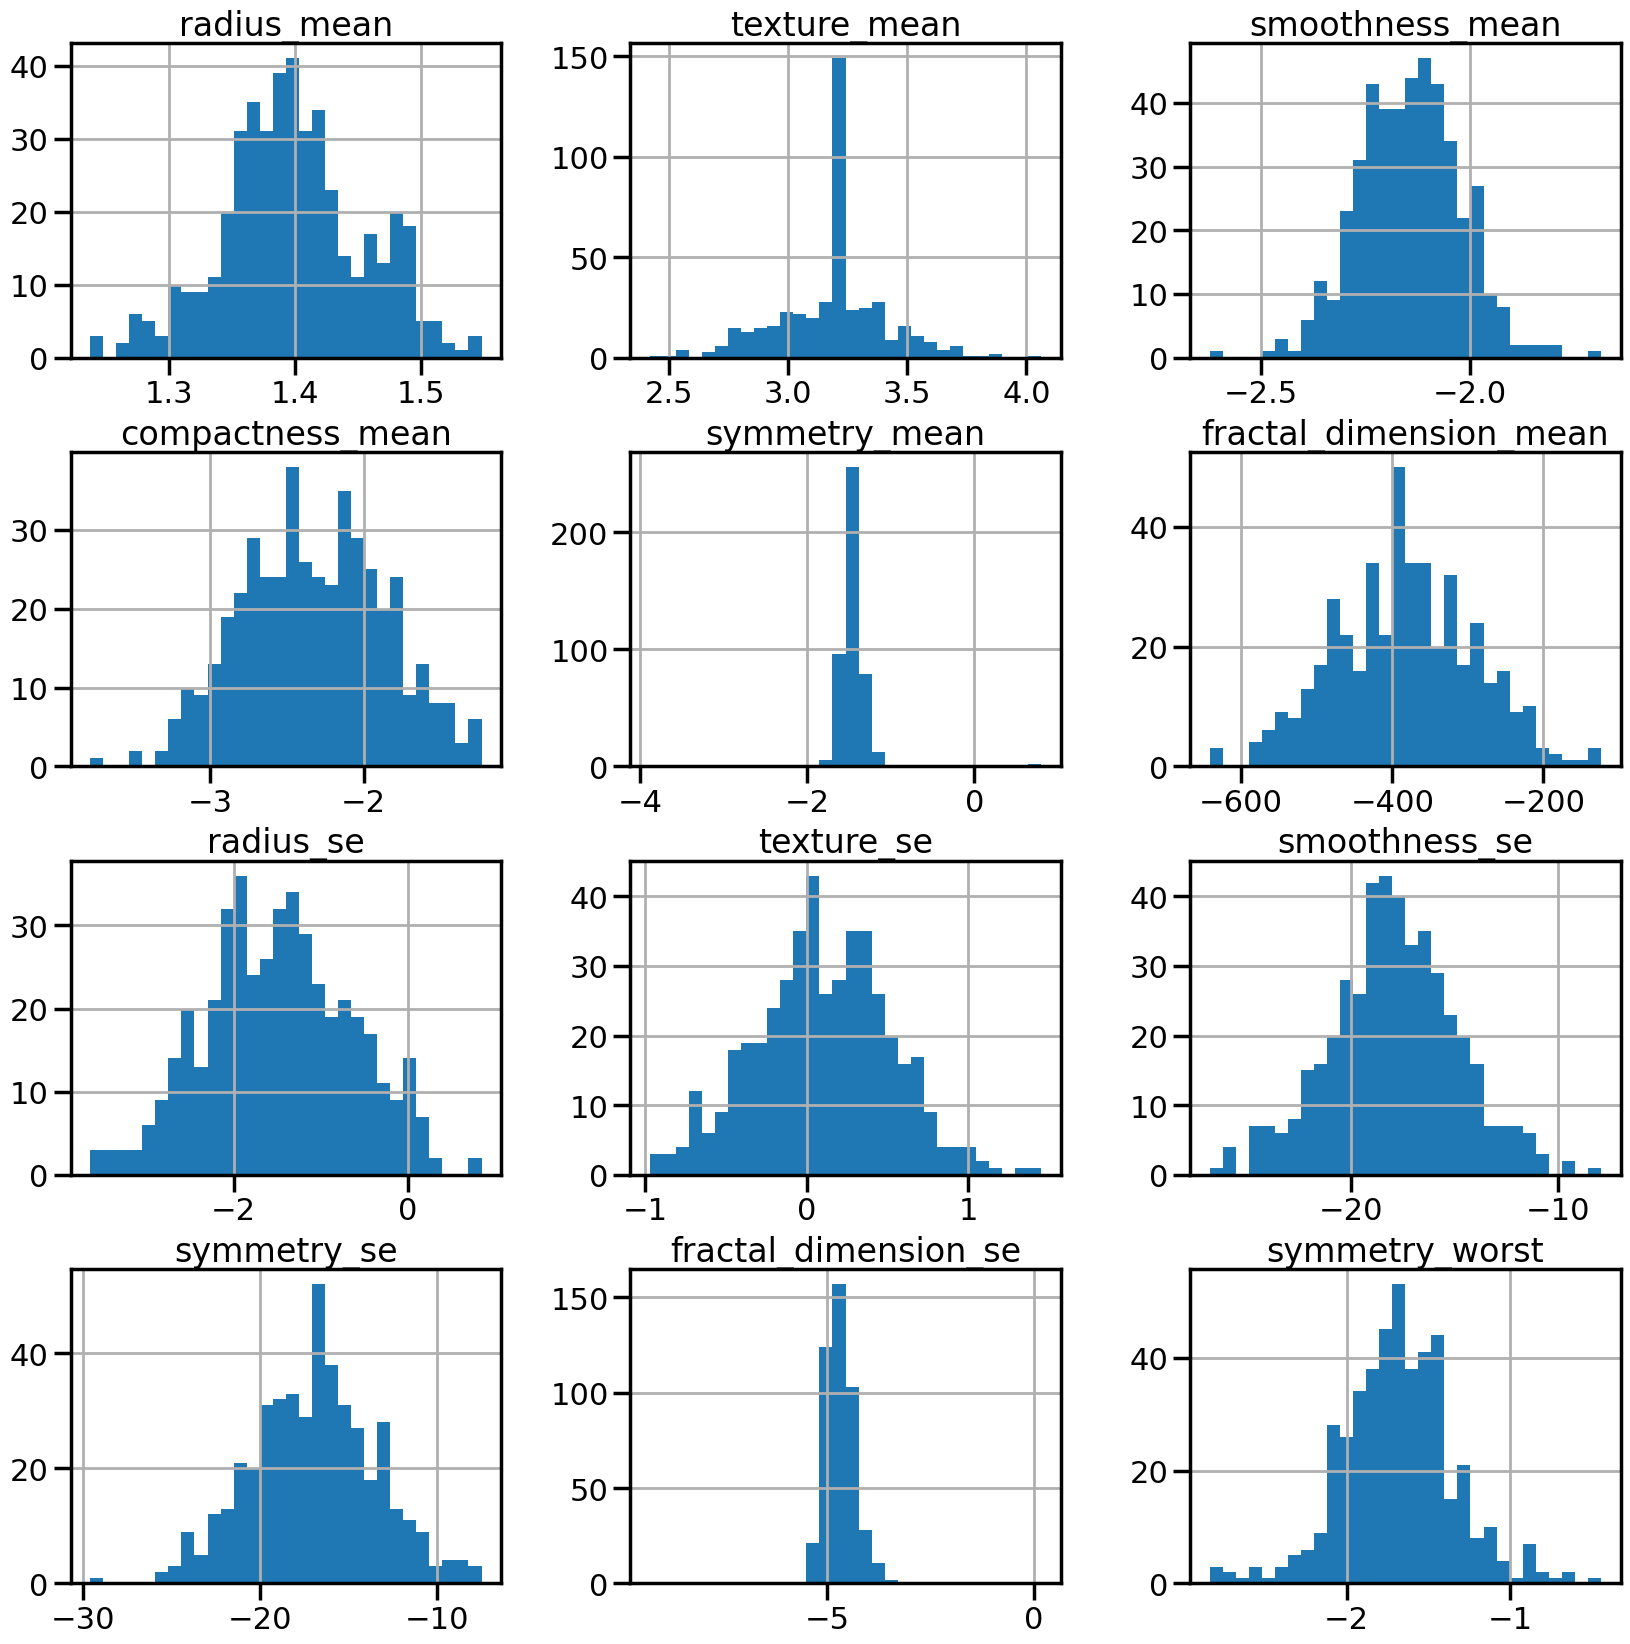

In [46]:
# Plot histograms of columns in the Box-Cox transformed training dataset
X_train_boxcox.hist(bins=30, figsize=(20, 20))


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'center': 'fractal_dimension_se'}>,
        <Axes: title={'center': 'symmetry_worst'}>]], dtype=object)

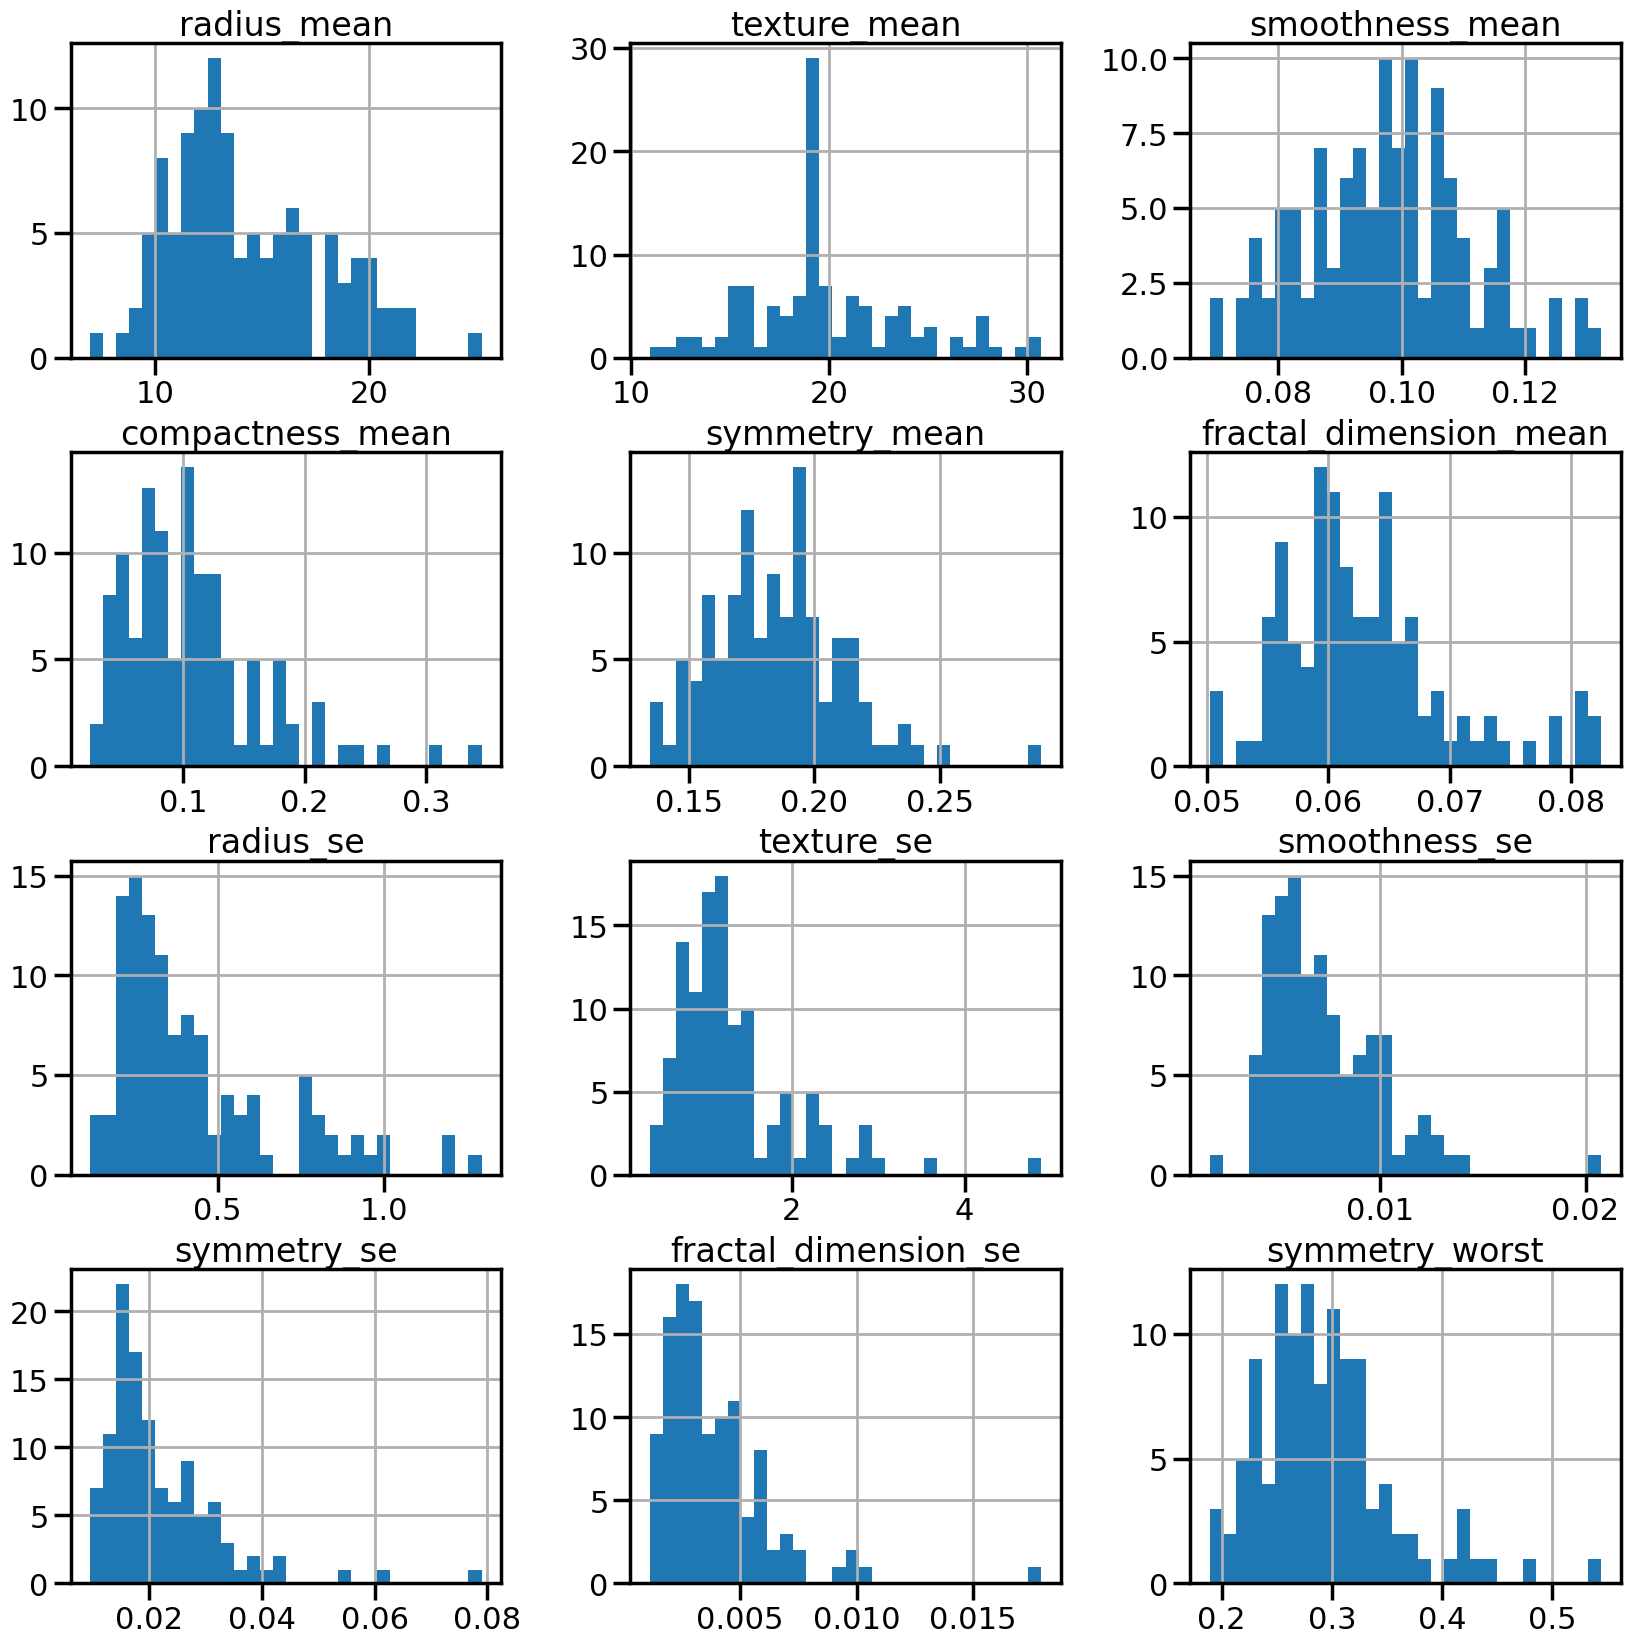

In [47]:
# Plot histograms of columns in the testing dataset before and after transformation
X_test.hist(bins=30, figsize=(20, 20))


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'center': 'fractal_dimension_se'}>,
        <Axes: title={'center': 'symmetry_worst'}>]], dtype=object)

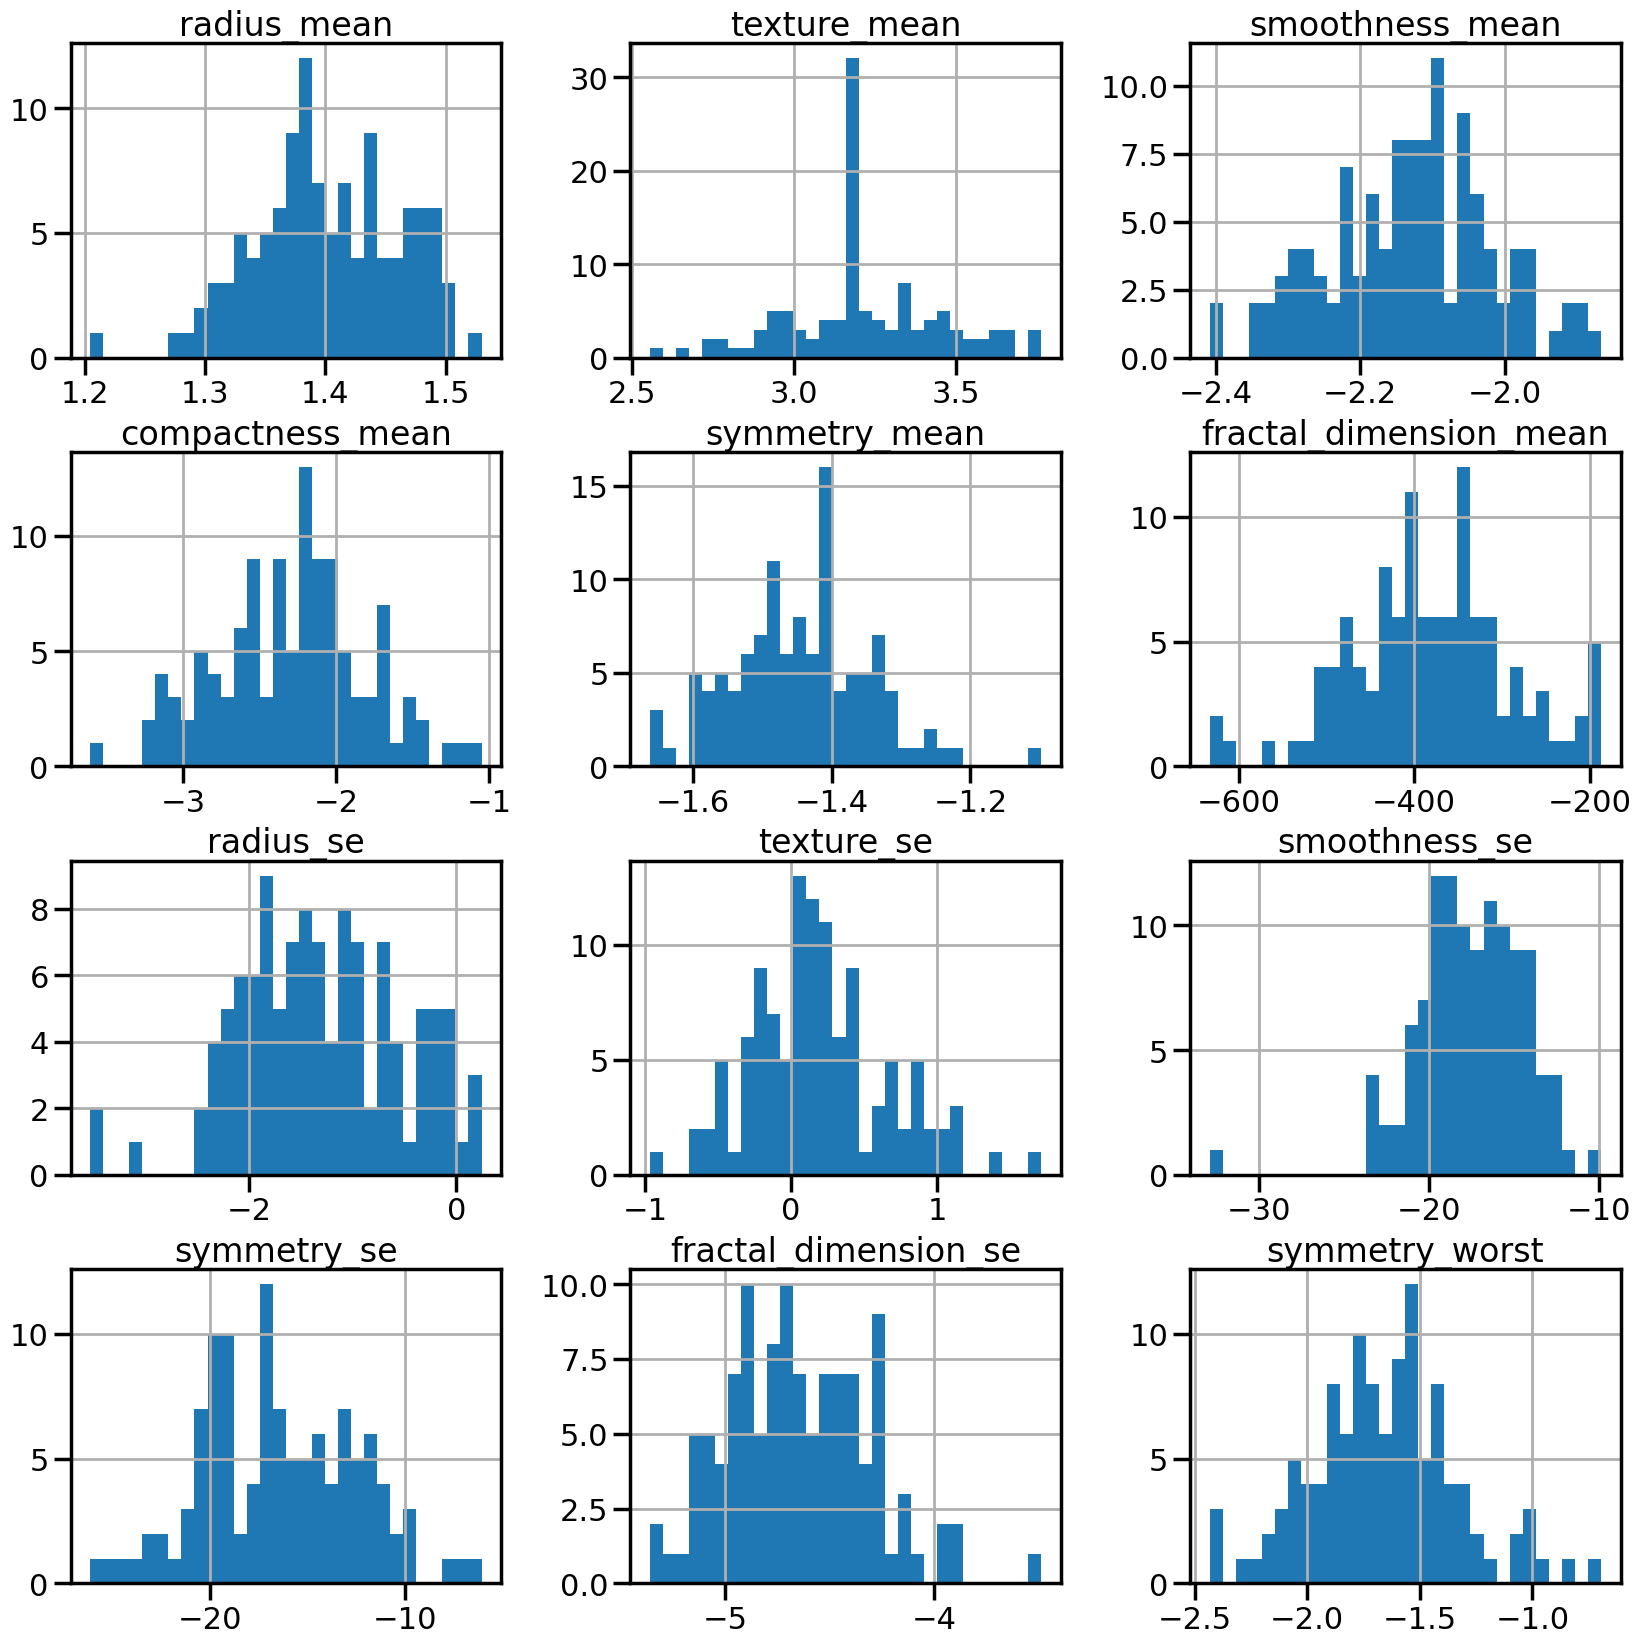

In [48]:
X_test_boxcox.hist(bins=30, figsize=(20, 20))


The histogram of X_test shows that some feature were skewed to the left but after transformation was applied the features becomes better than it was.

In [49]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler()

# Fit on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_boxcox)
X_test_scaled = scaler.transform(X_test_boxcox)


In [50]:
# Display the scaled training dataset
X_train_scaled

array([[0.59491872, 0.37773612, 0.68949498, ..., 0.49486479, 0.49797761,
        0.6478039 ],
       [0.41271683, 0.46859554, 0.44956516, ..., 0.49970798, 0.47808482,
        0.40465819],
       [0.73096004, 0.04603745, 0.70635942, ..., 0.78634353, 0.53149006,
        0.80175807],
       ...,
       [0.23796787, 0.33393465, 0.46587819, ..., 0.55707289, 0.5045419 ,
        0.4886391 ],
       [0.54047933, 0.49308115, 0.43084866, ..., 0.61410782, 0.46243354,
        0.39806412],
       [0.43659105, 0.52594244, 0.36049038, ..., 0.43628003, 0.43444559,
        0.44999858]])

In [51]:
# Display the scaled testing dataset
X_test_scaled

array([[0.58830405, 0.68043638, 0.38858529, ..., 0.57725888, 0.47072455,
        0.45758796],
       [0.44747424, 0.46746348, 0.46255954, ..., 0.27725362, 0.42690587,
        0.55243967],
       [0.22077437, 0.34468313, 0.40834864, ..., 0.69176621, 0.49145021,
        0.46691921],
       ...,
       [0.34651504, 0.46746348, 0.45391627, ..., 0.46354848, 0.51563299,
        0.40614544],
       [0.77672286, 0.70984114, 0.50070515, ..., 0.47368219, 0.49819549,
        0.66332551],
       [0.69444123, 0.54253825, 0.65566699, ..., 0.56592066, 0.49518124,
        0.43023809]])

In [52]:
# Confirm the successful scaling operation by checking the min and max values for a column in both datasets

X_train_scaled[:, 1].min()

0.0

In [53]:
X_train_scaled[:, 1].max()


1.0

In [54]:
X_test_scaled[:, 1].min()

0.08240909783017658

In [55]:
X_test_scaled[:, 1].max()

0.8185733314464452

## Exploratory Data Analysis (EDA) Summary:



The initial phase of the Exploratory Data Analysis (EDA) involved cleaning and preparing the dataset. This encompassed handling missing values, outliers, and redundant features, as well as removing duplicates and Visualization of features. Following this, the dataset was split into training and testing sets, with a test size of 20% and a random state of 42 for reproducibility.

Both the training and testing datasets were inspected to understand their structure, including columns, data types, and summary statistics. Categorical variables were encoded to convert them into numerical values using label encoder, facilitating further analysis. Additionally, relevant features were selected using techniques such as correlation analysis.

Histograms were plotted for selected columns in the training dataset to visualize feature distributions, aiding in identifying skewed features. Skewness values were then calculated to quantify the asymmetry of these distributions. To address skewness, a Box-Cox transformation was applied to normalize feature distributions, which was validated through re-plotting histograms post-transformation.

Finally, features were scaled using MinMaxScaler to ensure a consistent scale across all features, contributing to improved model performance and interpretability. Validation checks were performed to confirm the correctness of scaling operations. This comprehensive EDA process prepared the dataset for subsequent modeling tasks, laying a solid foundation for accurate predictions and insights.






# Unsupervised Machine learning

### Dimensionality Reduction Using PCA

In [82]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [79]:
# Prepare the dataset
X9 = dataset.drop(['diagnosis'], axis=1)
X9 = np.array(X9).reshape(len(X9), len(X9.columns))

In [80]:
# Scale the data
min_max_s = MinMaxScaler()
X_sca = min_max_s.fit_transform(X9)

In [83]:
# Perform PCA without specifying the number of components
pca = PCA()
X_transformed = pca.fit_transform(X_sca)


In [84]:
# Display the variance ratio
pca.explained_variance_ratio_

array([0.33809827, 0.23107871, 0.13308181, 0.08386261, 0.0735019 ,
       0.03809883, 0.03241163, 0.01824653, 0.01623147, 0.0151321 ,
       0.01081601, 0.00944013])

In [86]:
#Print explained variance ratios for top 12 components
for i, j in enumerate(pca.explained_variance_ratio_):
    print(f"{i+1}: {round(pca.explained_variance_ratio_[i]*100,2)}%")



1: 33.81%
2: 23.11%
3: 13.31%
4: 8.39%
5: 7.35%
6: 3.81%
7: 3.24%
8: 1.82%
9: 1.62%
10: 1.51%
11: 1.08%
12: 0.94%


Principal Component Analysis (PCA) reveals the variance explained by each component in our dataset:

PC1 (33.81% Variance): Captures the largest patterns or trends.
PC2 (23.11% Variance): Captures additional but less significant patterns compared to PC1.
PC3 (13.31% Variance): Accounts for further nuances in the data.
PCs 4-12: Explain diminishing amounts of variance.
This breakdown provides insights into the underlying structure and variability of our dataset, with the first few components representing the most significant patterns and trends

Text(0.5, 1.0, 'Principal Component vs. Explained Variance')

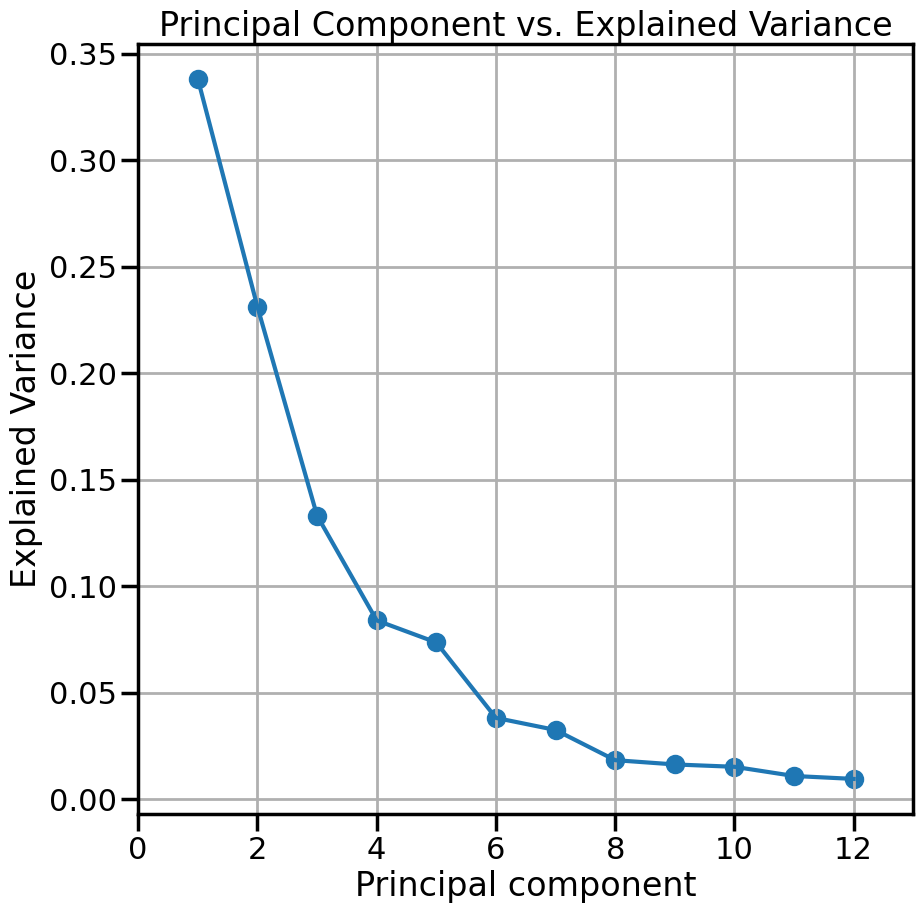

In [87]:
# Plot explained variance ratio for each principal component
plt.figure(figsize=(10,10))
plt.plot(range(1, 13), pca.explained_variance_ratio_)
plt.scatter(range(1, 13), pca.explained_variance_ratio_)
plt.grid()
plt.xlabel('Principal component')
plt.ylabel('Explained Variance')
plt.xlim(0, 13)
plt.title('Principal Component vs. Explained Variance')


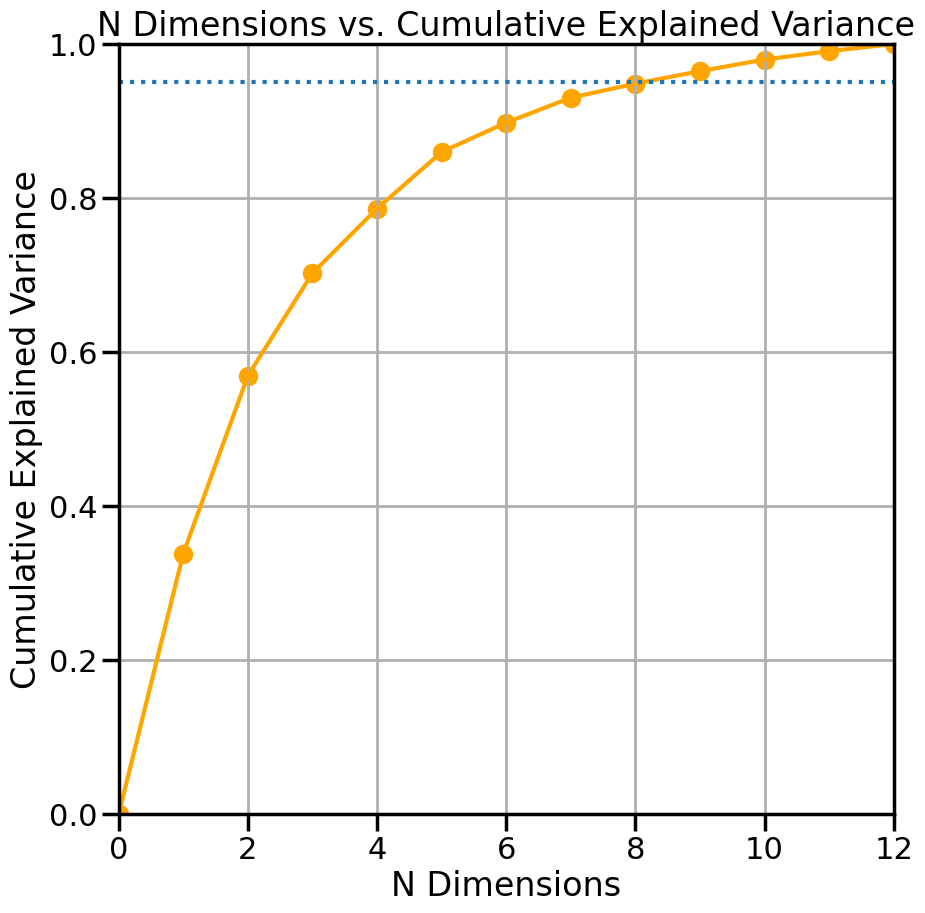

In [89]:
# Plot cumulative explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum = np.insert(cumsum, 0, 0)

plt.figure(figsize =(10,10))
plt.plot(range(0, 13), cumsum, c='orange')
plt.scatter(range(0, 13),cumsum, c='orange')
plt.grid()
plt.xlabel('N Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.title('N Dimensions vs. Cumulative Explained Variance')
plt.axhline(0.95, linestyle = 'dotted')

The plot shows that first 8 principal components captures 95% of the variance. 

In [90]:
# Perform PCA with 3 components
pca1 = PCA(n_components=3)
X_transformed = pca1.fit_transform(X_sca)

In [91]:
# Display the explained variance ratio 
pca1.explained_variance_ratio_

array([0.33809827, 0.23107871, 0.13308181])

Despite the first 8 principal components capturing 95% of the variance, the decision to retain 3 principal components is justified by their collective capture of 70% of the variance with meaningful patterns. This balance between dimensionality reduction and meaningful variance preservation ensures a simpler, interpretable model without significant loss of information. The selected components provide valuable insights into the underlying structure of the data, facilitating further analysis while maintaining clarity and interpretability.

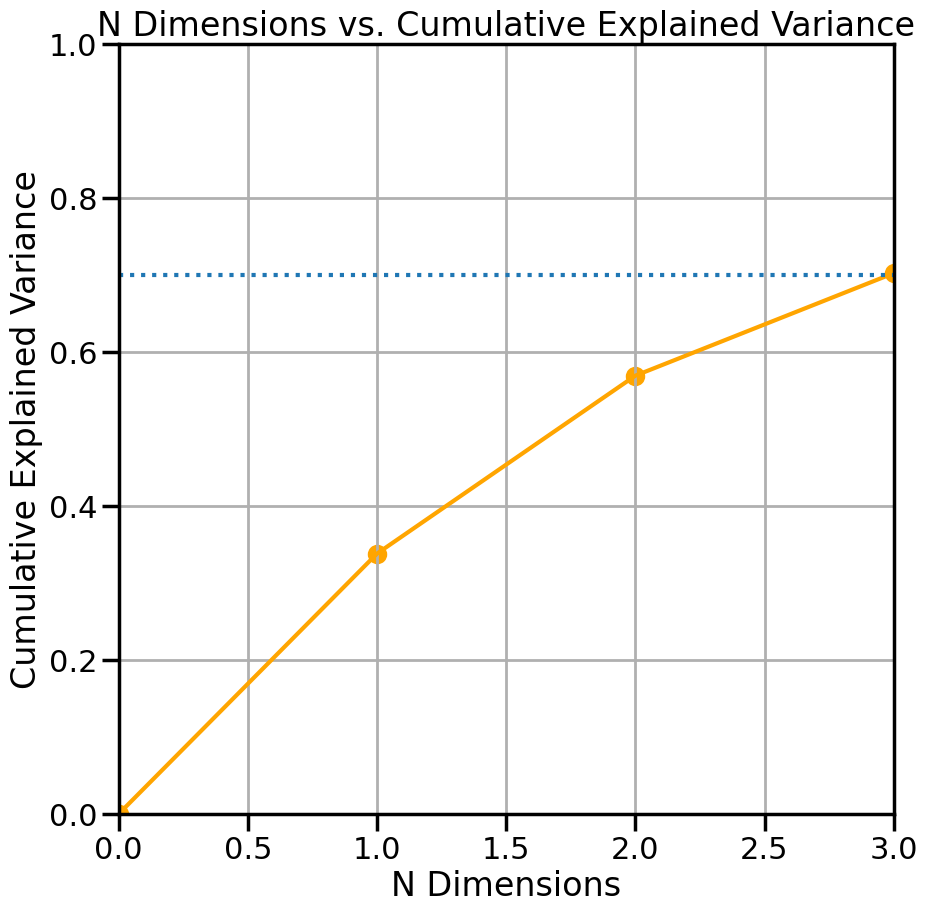

In [92]:
# Plot cumulative explained variance for 3 components
cumsum = np.cumsum(pca1.explained_variance_ratio_)
cumsum = np.insert(cumsum, 0, 0)

plt.figure(figsize =(10,10))
plt.plot(range(0, 4), cumsum, c='orange')
plt.scatter(range(0, 4),cumsum, c='orange')
plt.grid()
plt.xlabel('N Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.xlim(0, 3)
plt.ylim(0, 1)
plt.title('N Dimensions vs. Cumulative Explained Variance')
plt.axhline(0.70, linestyle = 'dotted')

In [93]:
# Fit PCA and transform the scaled data X_sca to obtain the transformed data X_transformed
X_transformed = pca1.fit_transform(X_sca)
X_transformed

array([[ 0.72062684,  0.10064731, -0.34401904],
       [-0.06603047, -0.34708211, -0.07610933],
       [ 0.30018869, -0.24593337, -0.07199424],
       ...,
       [-0.06717401, -0.27568887,  0.16463121],
       [ 0.66604744, -0.27280426,  0.10630297],
       [-0.35791259,  0.10376129,  0.24484106]])

In [94]:
# Prepare target variable for our visualization
y9=dataset['diagnosis']
y9= np.array(y9).reshape(len(y9),)

Text(0, 0.5, 'PC2')

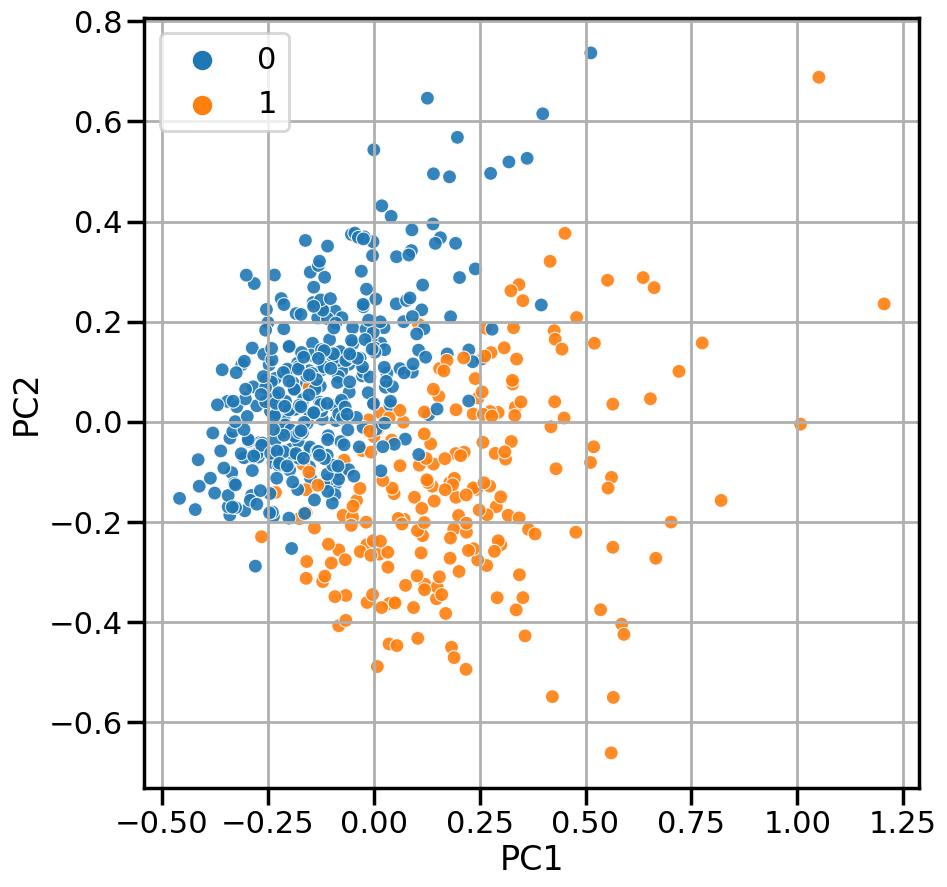

In [95]:
# Visualize PCA-transformed data
plt.figure(figsize=(10,10))
sns.scatterplot(data=None, x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y9, s=100, alpha=0.9)
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')

## TNSE

In [96]:
# Perform t-SNE with 3 Components for visualization
t_sne = TSNE(n_components=3)
X_transformed_t = t_sne.fit_transform(X_sca)

In [97]:
# Visualize 
d_t_sne = pd.DataFrame()
d_t_sne['Component 1'] = X_transformed_t[:, 0]
d_t_sne['Component 2'] = X_transformed_t[:, 1]
d_t_sne['Number'] = y9
d_t_sne.sort_values(by='Number', inplace=True)

<Axes: xlabel='Component 1', ylabel='Component 2'>

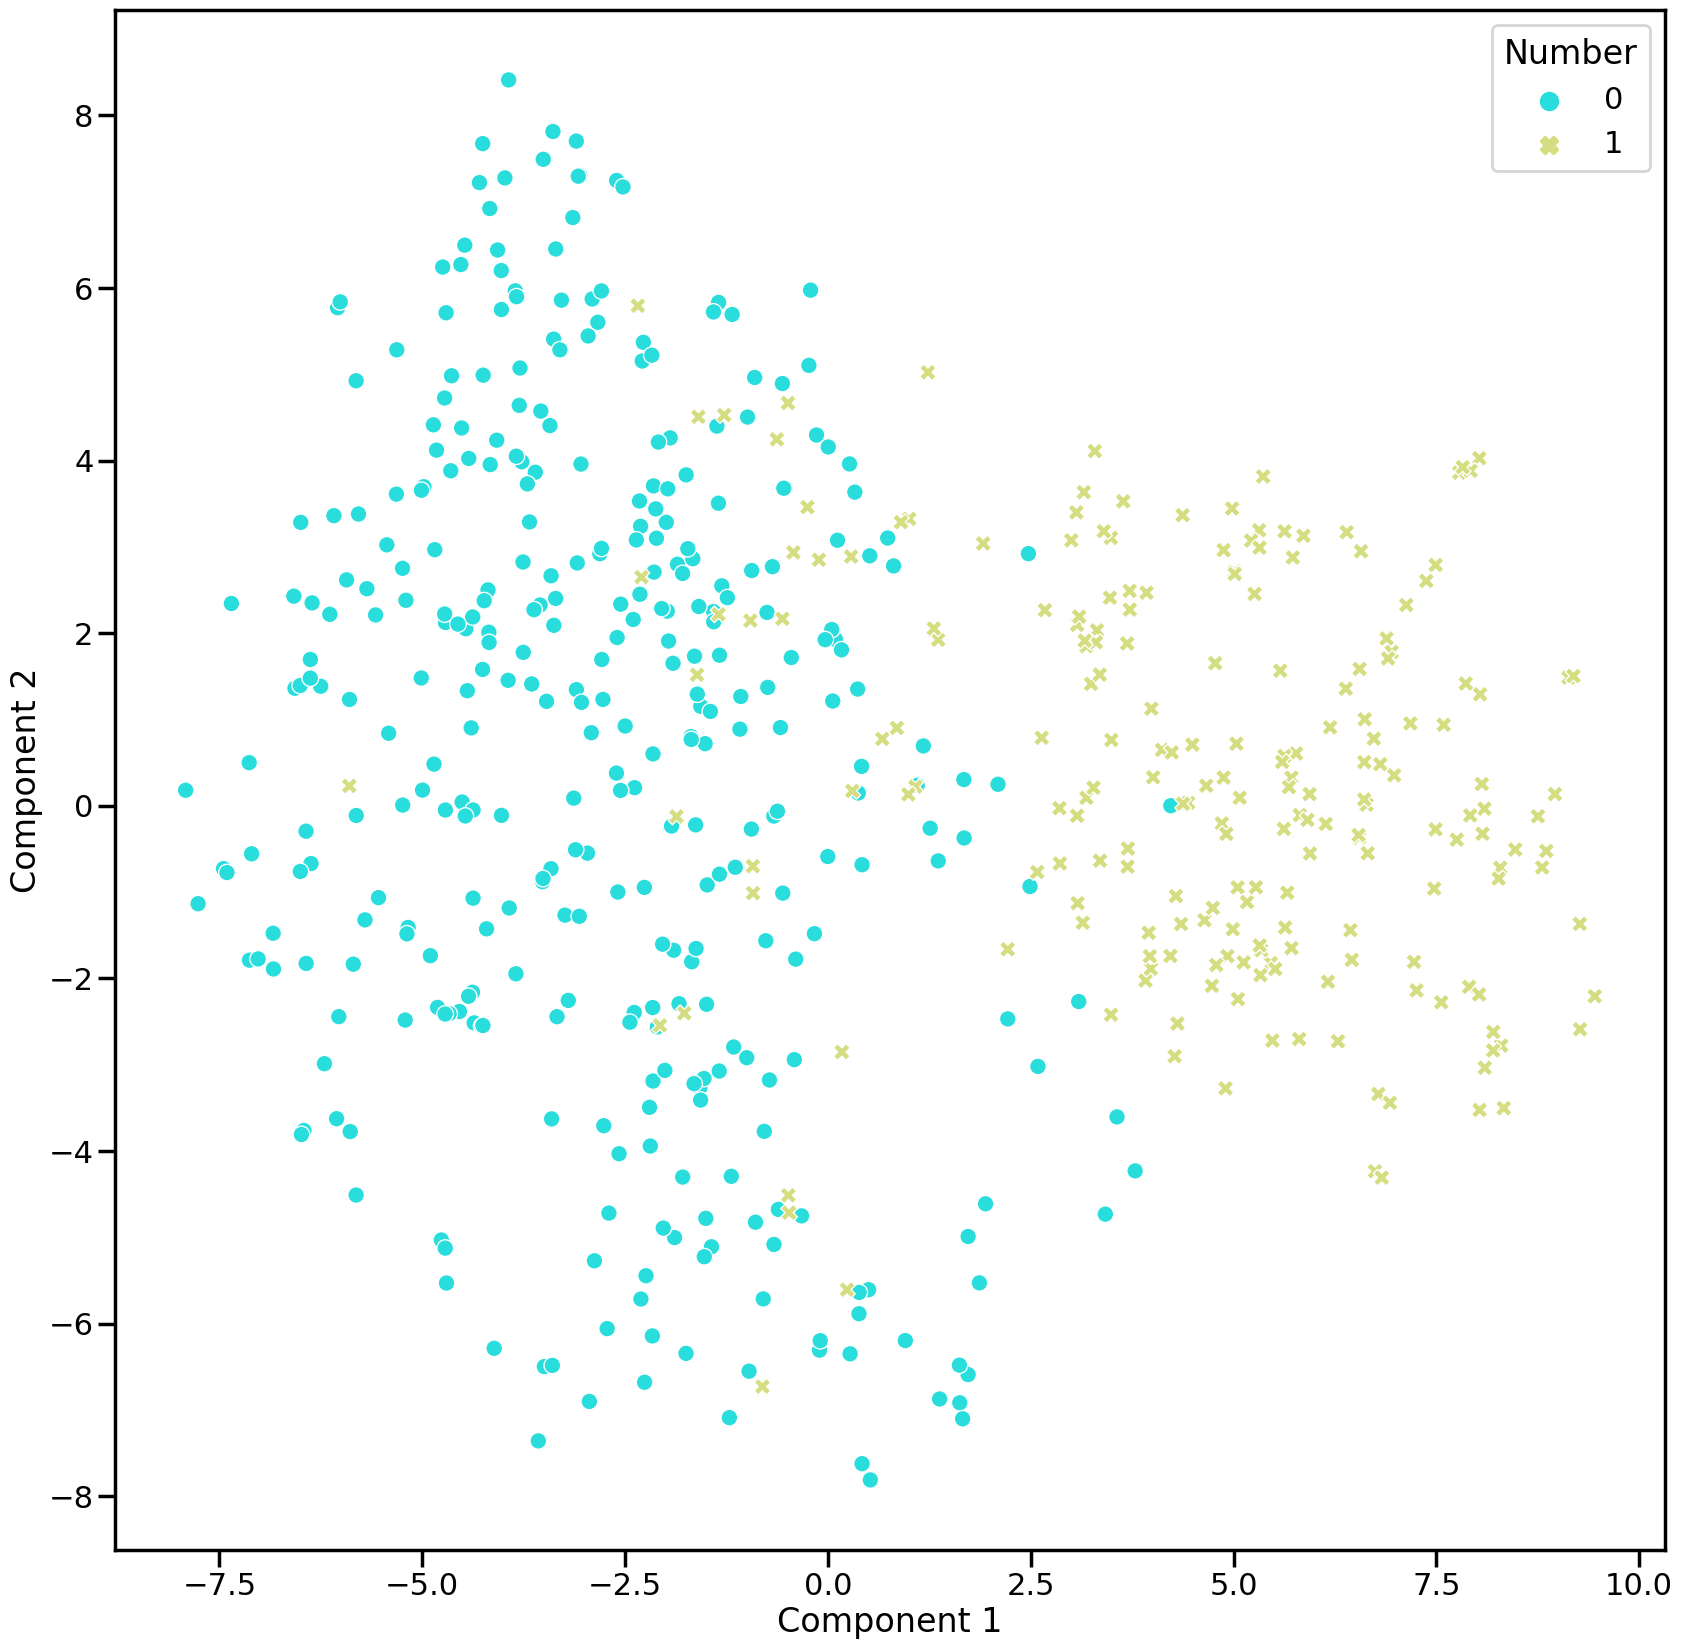

In [98]:
# Plot the scatterplot to visualize TSNE 
plt.figure(figsize=(20,20))

sns.set_context('poster')

sns.scatterplot(data=d_t_sne,
                x='Component 1',
                y='Component 2',
                hue='Number',
                palette='rainbow',
                style='Number')

## Summary

The unsupervised analysis using Principal Component Analysis (PCA) was performed by scaling our features from our EDA without the target variable using Min-Max scaling to standardize their ranges, ensuring uniformity across the dataset. Subsequently, PCA was executed without specifying the number of components, allowing it to encompass all available dimensions.

The examination of variance explained by each principal component revealed distinct percentages for the top 12 components, including notable proportions such as 33.81%, 23.11%, and 13.31%. To gain insights into the significance of these components, visualizations were crafted. A plot illustrating Principal Component vs. Explained Variance was constructed, shedding light on the variance contribution of each dimension. Furthermore, a cumulative explained variance plot was generated to determine the number of principal components required to retain a desired threshold of variance, such as 95% or 70%.

Following the initial PCA analysis, a secondary PCA was conducted with the number of components set to 3. This reduced dataset yielded principal components with variance contributions of 33.81%, 23.11%, and 13.31%. The reduced dataset was then visualized through a scatter plot, depicting the first two principal components plotted against each other and colored by the target variable 'diagnosis'. This visualization aimed to uncover any discernible patterns or separations between different classes within the dataset.

Lastly, to capture complex nonlinear relationships that may not be readily apparent in a linear space, t-Distributed Stochastic Neighbor Embedding (t-SNE) was applied to the scaled data using 3 components. This technique facilitated the visualization of the dataset in a lower-dimensional space, offering insights into intricate data structures and relationships beyond what PCA alone could reveal.






## Supervised Learning using Classification method


In [127]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_decision_regions


In [101]:

X_train = X_train_scaled
X_test = X_test_scaled

In [102]:
# Selecting the first and third columns radius_mean and compactness_mean for model predictions
X_train_selected = X_train[:, [0, 2]]  
X_test_selected = X_test[:, [0, 2]]  

## Building models for predictions

### Logistic Regression

In [103]:
# Train logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_selected, y_train)


LogisticRegression()

In [104]:
# Logistic Regression Model Evaluation
logistic_regression_predictions = logistic_regression_model.predict(X_test_selected)
accuracy_lr = accuracy_score(y_test, logistic_regression_predictions)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, logistic_regression_predictions))

Logistic Regression Accuracy: 0.9210526315789473
Confusion Matrix for Logistic Regression:
[[64  3]
 [ 6 41]]


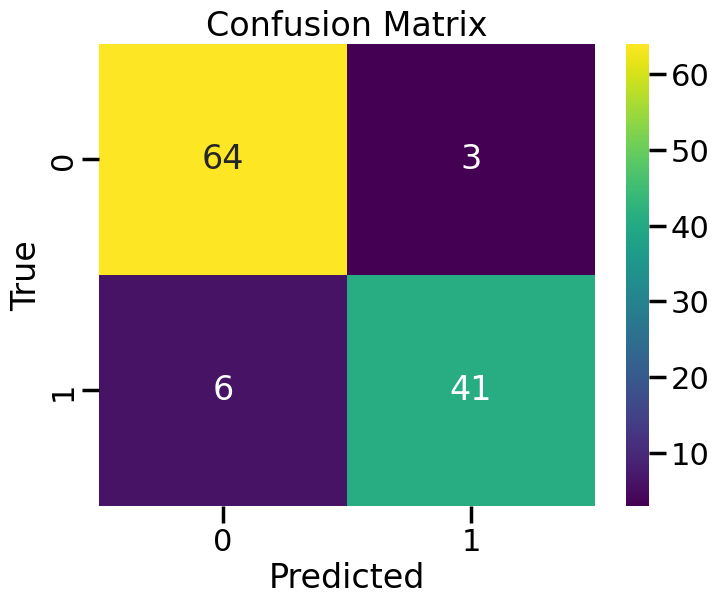

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logistic_regression_predictions), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

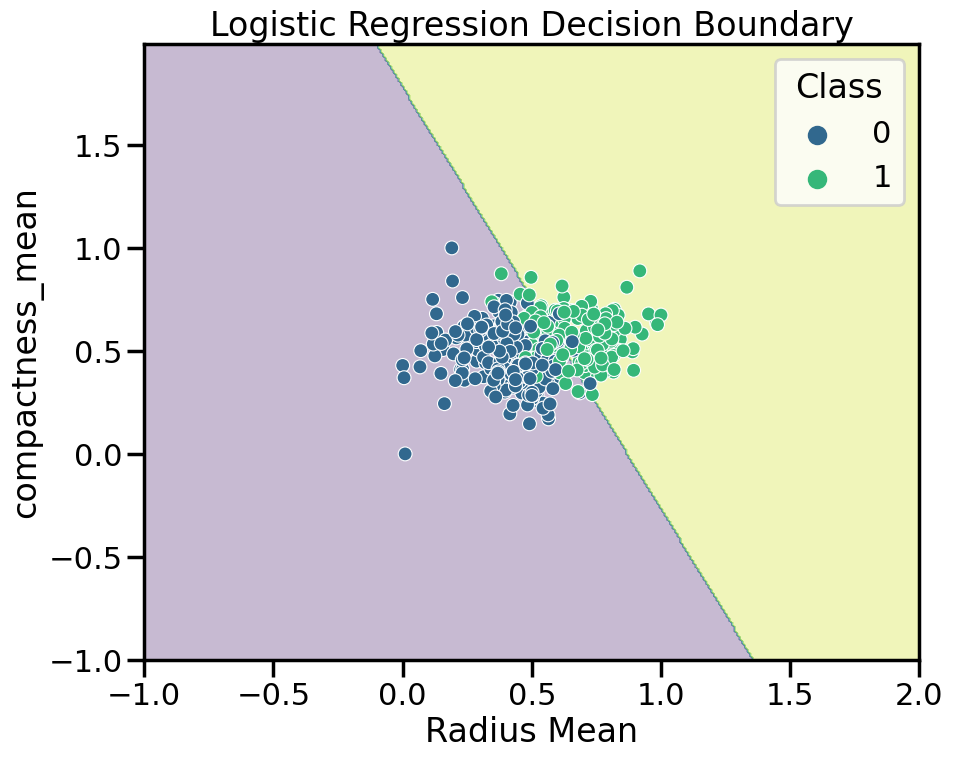

In [106]:
# Generate a grid of points to plot the decision boundary
x_min, x_max = X_train_selected[:, 0].min() - 1, X_train_selected[:, 0].max() + 1
y_min, y_max = X_train_selected[:, 1].min() - 1, X_train_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for the grid points
Z = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot data points
sns.scatterplot(x=X_train_selected[:, 0], y=X_train_selected[:, 1], hue=y_train, palette='viridis', s=100)

# Add labels and legend
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Radius Mean')
plt.ylabel('compactness_mean')
plt.legend(title='Class')

plt.show()

### Linear SVC

In [134]:
# Train Linear SVC model
linear_svc_model = SVC(kernel='linear', C=3)
linear_svc_model.fit(X_train_selected, y_train)


SVC(C=3, kernel='linear')

In [136]:
# Linear SVC Model Evaluation
linear_svc_predictions = linear_svc_model.predict(X_test_selected)
accuracy_svc = accuracy_score(y_test, linear_svc_predictions)
print("Linear SVC Accuracy:", accuracy_svc)
print("Confusion Matrix for Linear SVC:")
print(confusion_matrix(y_test, linear_svc_predictions))




Linear SVC Accuracy: 0.9298245614035088
Confusion Matrix for Linear SVC:
[[64  3]
 [ 5 42]]


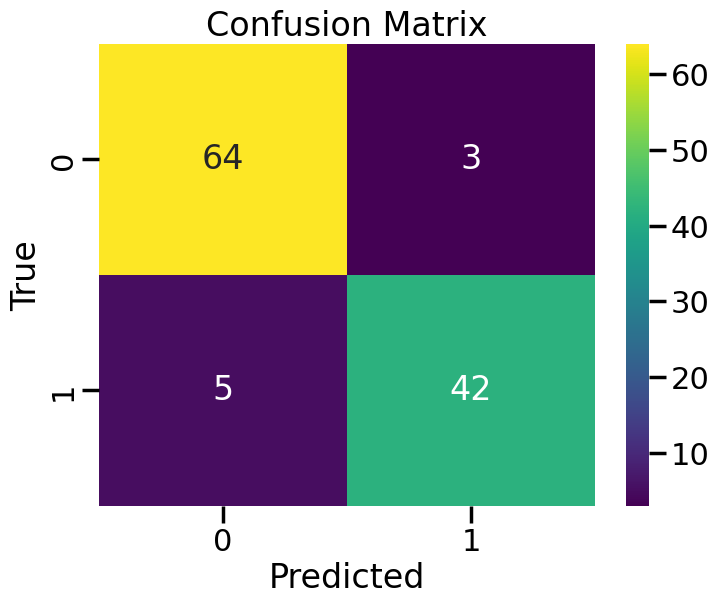

In [137]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, linear_svc_predictions), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

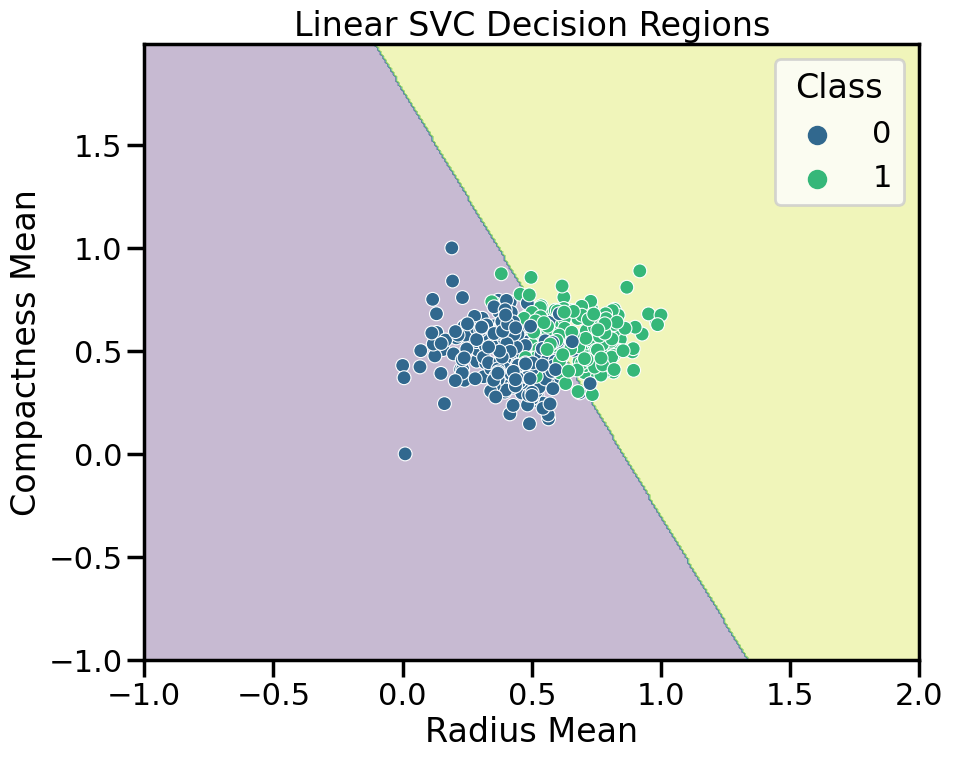

In [111]:
x_min, x_max = X_train_selected[:, 0].min() - 1, X_train_selected[:, 0].max() + 1
y_min, y_max = X_train_selected[:, 1].min() - 1, X_train_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# Plot decision boundary

Z = linear_svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(x=X_train_selected[:, 0], y=X_train_selected[:, 1], hue=y_train, palette='viridis', s=100)
# Add labels and legend
plt.title('Linear SVC Decision Regions')
plt.xlabel('Radius Mean')
plt.ylabel('Compactness Mean')
plt.legend(title='Class')

plt.show()

### Polynomial SVC

In [112]:
# Train Polynomial SVC model
poly_svc_model = SVC(kernel='poly', degree=3, coef0=1, C=5)
poly_svc_model.fit(X_train_selected, y_train)



SVC(C=5, coef0=1, kernel='poly')

In [113]:
# Polynomial SVC Model Evaluation
poly_svc_predictions = poly_svc_model.predict(X_test_selected)
accuracy_poly_svc = accuracy_score(y_test, poly_svc_predictions)
print("Polynomial SVC Accuracy:", accuracy_poly_svc)
print("Confusion Matrix for Polynomial SVC:")
print(confusion_matrix(y_test, poly_svc_predictions))



Polynomial SVC Accuracy: 0.9210526315789473
Confusion Matrix for Polynomial SVC:
[[64  3]
 [ 6 41]]


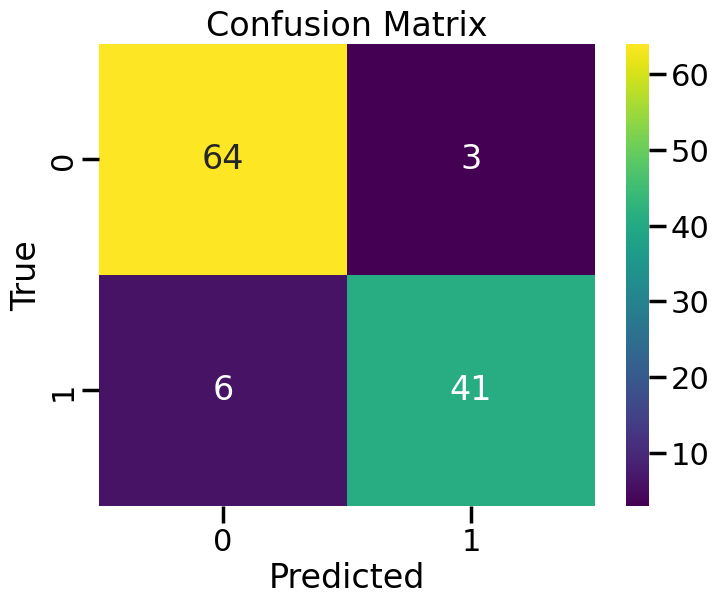

In [116]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, poly_svc_predictions), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

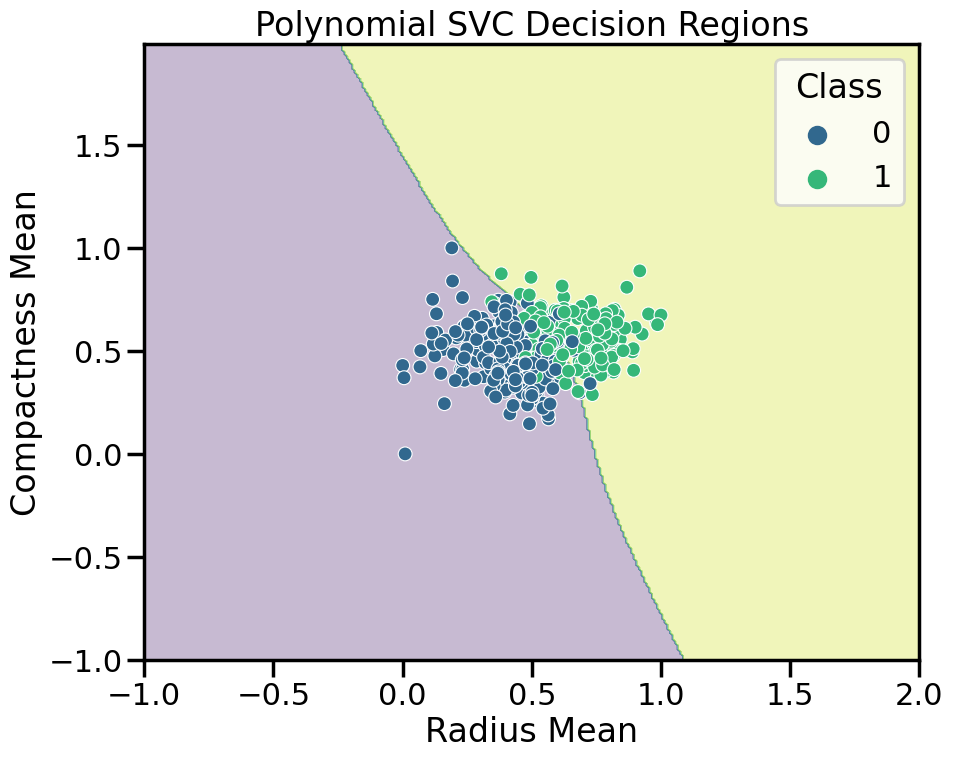

In [148]:
# Plot Polynomial SVC Decision Regions
x_min, x_max = X_train_selected[:, 0].min() - 1, X_train_selected[:, 0].max() + 1
y_min, y_max = X_train_selected[:, 1].min() - 1, X_train_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = poly_svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(x=X_train_selected[:, 0], y=X_train_selected[:, 1], hue=y_train, palette='viridis', s=100)
plt.title('Polynomial SVC Decision Regions')
plt.xlabel('Radius Mean')
plt.ylabel('Compactness Mean')
plt.legend(title='Class')
plt.show()

### Decision Tree Classifier

In [120]:
# Train Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(X_train_selected, y_train)



DecisionTreeClassifier(max_depth=3)

In [121]:
# Predictions for Decision Tree Classifier
decision_tree_predictions = decision_tree_model.predict(X_test_selected)


In [123]:
# Accuracy Score for Decision Tree Classifier
accuracy_decision_tree = accuracy_score(y_test, decision_tree_predictions)
print("Decision Tree Classifier Accuracy:", accuracy_decision_tree)
# Confusion Matrix for Decision Tree Classifier
conf_matrix_decision_tree = confusion_matrix(y_test, decision_tree_predictions)
print("Confusion Matrix for Decision Tree Classifier:")
print(conf_matrix_decision_tree)

Decision Tree Classifier Accuracy: 0.9122807017543859
Confusion Matrix for Decision Tree Classifier:
[[62  5]
 [ 5 42]]


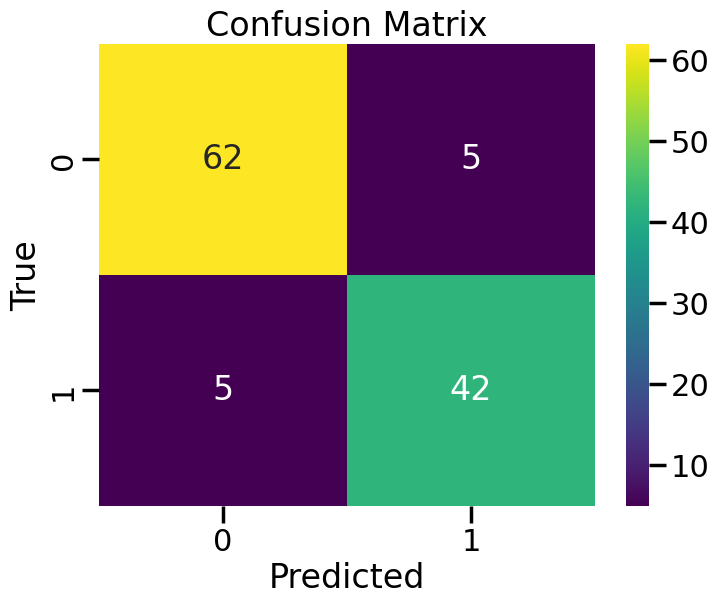

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, decision_tree_predictions), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

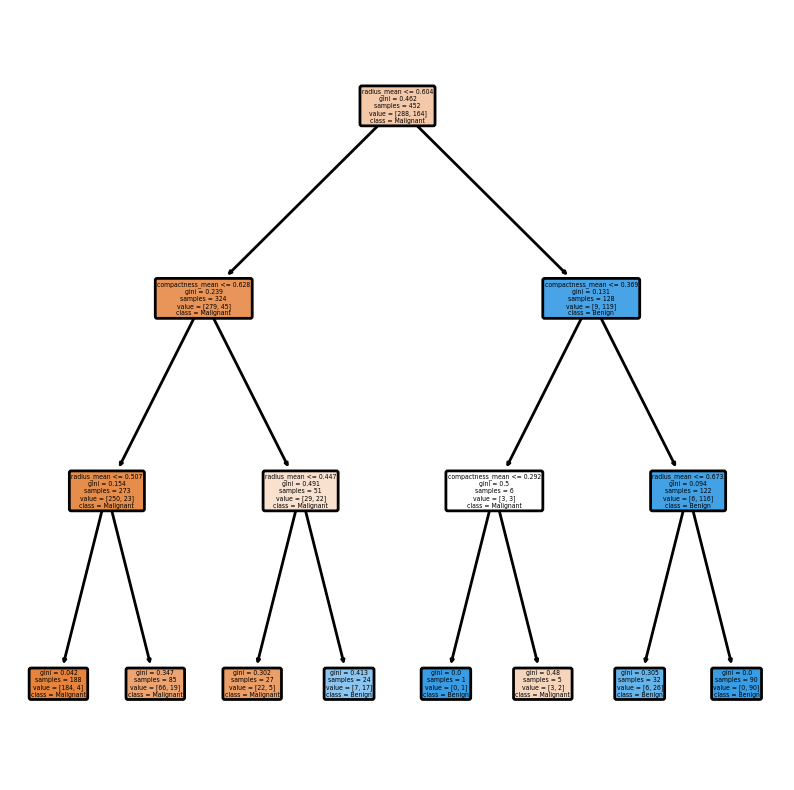

In [126]:
# Plot decision tree
plt.figure(figsize=(10, 10))
plot_tree(decision_tree_model, feature_names=['radius_mean', 'compactness_mean'],
      filled=True,
      class_names=['Malignant', 'Benign'],
      rounded=True)
plt.show()

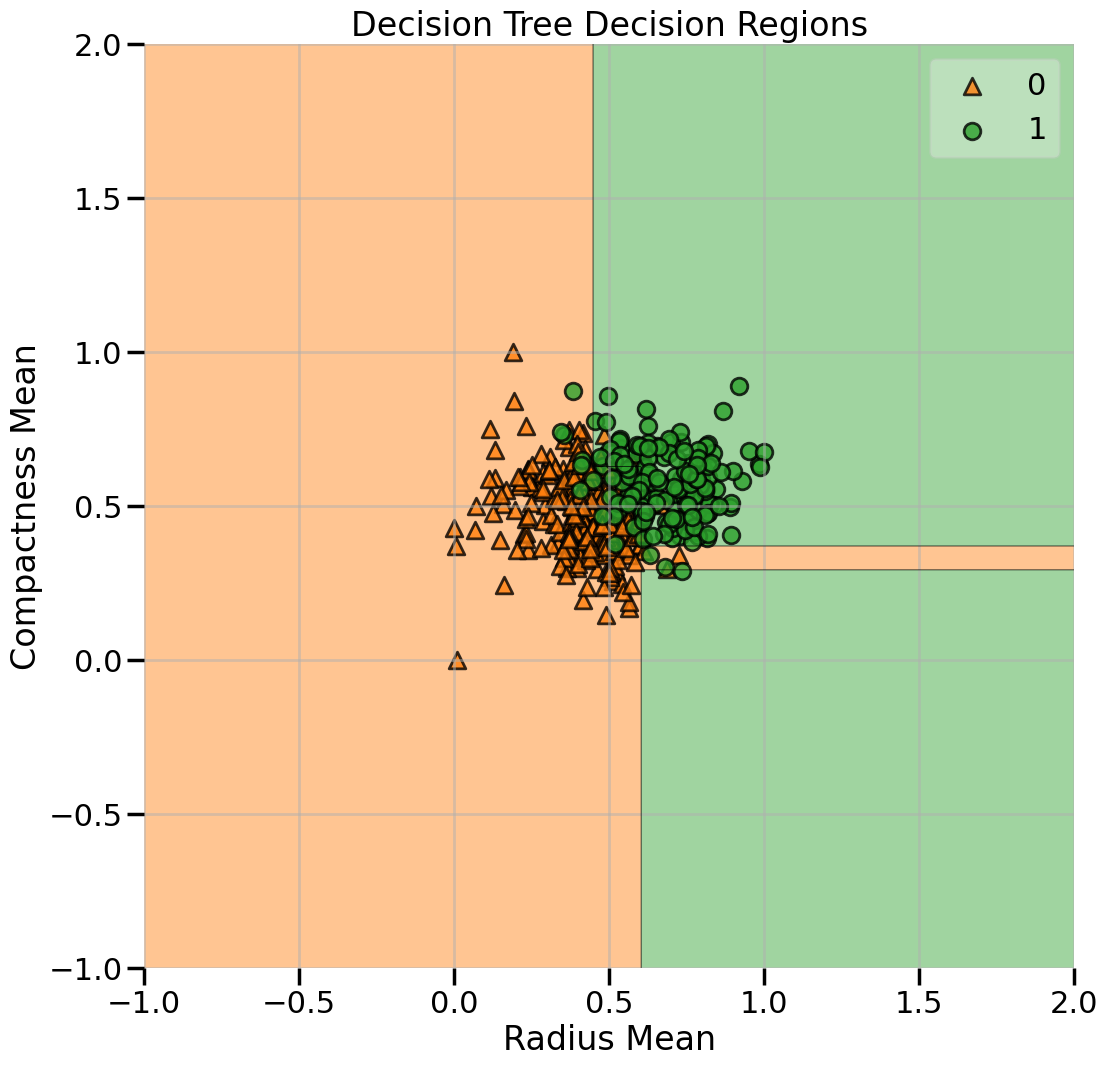

In [145]:
# Plot decision tree regions
# Convert Pandas Series to NumPy array
y_train_np = y_train.values

plt.figure(figsize=(12, 12))
plot_decision_regions(X_train_selected, y_train_np, clf=decision_tree_model, legend=1, colors='tab:orange,tab:green', markers='^o')
plt.xlabel('Radius Mean')
plt.ylabel('Compactness Mean')
plt.title('Decision Tree Decision Regions')
plt.grid(alpha=0.5)
plt.show()


### Random Forest Regressor

In [138]:
# Random Forest Regressor
random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit(X_train_selected, y_train)



RandomForestRegressor()

In [139]:
# Evaluate Random Forest Regressor model
random_forest_regressor_predictions = random_forest_regressor_model.predict(X_test_selected)
mse_rf_regressor = mean_squared_error(y_test, random_forest_regressor_predictions)

print("\nRandom Forest Regressor MSE:", mse_rf_regressor)



Random Forest Regressor MSE: 0.0729280701754386


A lower MSE indicates better predictive performance, as it suggests that the model's predictions are closer to the true values.

## Model Evaluation using different metrics

#### Accuracy Score

In [141]:
# Create a dictionary to store model predictions
models = {
    'Logistic Regression': logistic_regression_predictions,
    'Linear SVC': linear_svc_predictions,
    'Polynomial SVC': poly_svc_predictions,
    'Decision Tree': decision_tree_predictions
}

# Evaluate and print accuracy for each model
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    print(f'{model_name} Accuracy: {accuracy}')

# Find the best model based on accuracy
best_model = max(models, key=lambda k: accuracy_score(y_test, models[k]))
print(f'\nBest Model based on Accuracy: {best_model}')

Logistic Regression Accuracy: 0.9210526315789473
Linear SVC Accuracy: 0.9298245614035088
Polynomial SVC Accuracy: 0.9210526315789473
Decision Tree Accuracy: 0.9122807017543859

Best Model based on Accuracy: Linear SVC


#### Confusion Matrix and Classification Report

In [142]:
# Create a dictionary to store model predictions
models = {
    'Logistic Regression': logistic_regression_predictions,
    'Linear SVC': linear_svc_predictions,
    'Polynomial SVC': poly_svc_predictions,
    'Decision Tree': decision_tree_predictions
}

# Evaluate and print classification report for each model
for model_name, predictions in models.items():
    report = classification_report(y_test, predictions)
    print(f'{model_name} Classification Report:\n{report}')

# Evaluate and print confusion matrix for each model
for model_name, predictions in models.items():
    matrix = confusion_matrix(y_test, predictions)
    print(f'{model_name} Confusion Matrix:\n{matrix}')

# Find the best model based on F1-score
best_model = max(models, key=lambda k: f1_score(y_test, models[k], average='weighted'))
print(f'\nBest Model based on F1-score: {best_model}')


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        67
           1       0.93      0.87      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

Linear SVC Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Polynomial SVC Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        67
           1       0.93      0.87      0.90        47

    accuracy                           0.92       114
   macro avg 

In this assessment, different supervised learning models was performed on dataset with the aim of determining the most suitable model for predicting a target variable based on various features. The models under scrutiny encompass Logistic Regression, Linear SVC, Polynomial SVC, and Decision Tree Classifier.

Model Assessment:
The model was trained each on the training dataset and then scrutinize its performance on independent test dataset. For every model, several assessment metrics was calculated, including accuracy score, confusion matrix, and classification report.

Logistic Regression:

Accuracy Score: 92.11%
Confusion Matrix:
[[64 3]
[ 6 41]]
Interpretation: Logistic Regression achieves commendable accuracy, correctly classifying 92.11% of instances. The confusion matrix highlights minimal misclassifications, with only 6 false negatives and 3 false positives.

Linear SVC:

Accuracy Score: 92.98%
Confusion Matrix:
[[64 3]
[ 5 42]]
Interpretation: Linear SVC exhibits a slight improvement over Logistic Regression, achieving an accuracy score of 92.98%. It displays balanced performance, with only 5 false negatives and 3 false positives.

Polynomial SVC:

Accuracy Score: 92.11%
Confusion Matrix:
[[64 3]
[ 6 41]]
Interpretation: Polynomial SVC mirrors Logistic Regression's accuracy score. Though its performance is comparable, its decision boundary might differ due to the polynomial kernel.

Decision Tree Classifier:

Accuracy Score: 91.23%
Confusion Matrix:
[[62 5]
[ 5 42]]
Interpretation: Decision Tree Classifier demonstrates respectable performance, yielding an accuracy score of 91.23%. However, it displays marginally higher misclassification rates compared to other models, with 5 false negatives and 5 false positives.

Model Comparison and Selection:
Upon evaluating the accuracy scores, Linear SVC emerges as the top-performing model, boasting the highest accuracy among all models assessed. Its balanced performance and minimal misclassifications make it the preferred choice for predicting the target variable in our dataset.

Conclusion:
In summary, our analysis of supervised learning models identifies Linear SVC as the most effective model for our dataset. Nevertheless, further refinement and optimization may be necessary to enhance its performance.

### Model tuning using GridSearchCV

In [143]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear SVC': SVC(kernel='linear'),
    'Polynomial SVC': SVC(kernel='poly', degree=3, coef0=1, C=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=3)
}

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Linear SVC': {'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Polynomial SVC': {'model__C': [0.001, 0.01, 0.1, 1, 10, 100], 'model__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'model__max_depth': [3, 10, 20, 30], 'model__min_samples_split': [2, 5, 10]}
}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    pipeline = Pipeline([
        ('model', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_selected, y_train)  

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_accuracy = grid_search.best_score_

    print(f'\nBest Parameters for {model_name}: {best_params}')
    print(f'Best Accuracy for {model_name}: {best_accuracy}')

    # Evaluate the best model on the test set
    test_accuracy = best_model.score(X_test_selected, y_test)  
    print(f'Test Accuracy for {model_name}: {test_accuracy}')



Best Parameters for Logistic Regression: {'model__C': 100}
Best Accuracy for Logistic Regression: 0.9003418803418803
Test Accuracy for Logistic Regression: 0.9210526315789473

Best Parameters for Linear SVC: {'model__C': 100}
Best Accuracy for Linear SVC: 0.8980952380952381
Test Accuracy for Linear SVC: 0.9122807017543859

Best Parameters for Polynomial SVC: {'model__C': 100, 'model__gamma': 0.1}
Best Accuracy for Polynomial SVC: 0.8958974358974359
Test Accuracy for Polynomial SVC: 0.9210526315789473

Best Parameters for Decision Tree: {'model__max_depth': 3, 'model__min_samples_split': 2}
Best Accuracy for Decision Tree: 0.8826373626373627
Test Accuracy for Decision Tree: 0.9122807017543859


These results suggest that Logistic Regression and Polynomial SVC perform slightly better than Linear SVC and Decision Tree models, with test accuracies around 92%.







### Final Conclusion


This analysis provided valuable insights into the breast cancer dataset. The exploratory data analysis (EDA) provided a clear understanding of the data distribution, highlighting key features and potential patterns. Principal Component Analysis (PCA) revealed the underlying structure of the data, helping us identify important dimensions and reduce the feature space. Supervised learning models, coupled with GridSearchCV for hyperparameter tuning, enabled us to build predictive models with high accuracy, particularly emphasizing Linear SVC as the most effective model.

#### Evaluations

EDA provided a solid foundation for understanding the dataset, identifying key variables, and detecting potential relationships.
Dimensionality Reduction (PCA) effectively reduced the feature space while retaining significant variance, aiding in model interpretability and computational efficiency.
Supervised learning models demonstrated strong predictive performance, with Linear SVC emerging as the top-performing model based on accuracy and robustness.
Hyperparameter Tuning: GridSearchCV optimized model hyperparameters, enhancing model performance and generalization.


#### Recommendations

Regular data exploration and analysis can uncover new insights and patterns, contributing to better model performance and understanding.
The analysis heavily relies on the quality and completeness of the dataset. Incomplete or biased data could affect the accuracy and reliability of the models.


#### Ethical Implications



Impact on Decision-Making: Predictive models may influence medical decision-making processes, emphasizing the importance of accurate and ethical use to avoid potential harm or misinterpretation.


In conclusion, the integration of EDA, PCA, and supervised learning techniques provides a comprehensive framework for data analysis and model development. l

### References

https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
    
https://towardsdatascience.com/bayesian-optimization-for-hyperparameter-tuning-how-and-why-655b0ee0b399
    
https://towardsdatascience.com/performance-metrics-in-machine-learning-part-1-classification-6c6b8d8a8c92 
    
https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3